Projet deep learning Dataset : Fraud detection
Binome : 
 - Wacim BELAHCEL
 - Imad Oualid KACIMI
 

#**Library Import**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.gridspec as gridspec

import sklearn

import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sys
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import classification_report, confusion_matrix




seed_value = 1
import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Function used**

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,60])
  plt.ylim([75,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')


def pca_reduction(data):
   scl = StandardScaler( )
   pca_data = scl.fit_transform(data) 
   pca = PCA(n_components=2,random_state=3)
   X_pca = pca.fit_transform(pca_data)
   return X_pca

def tsne_reduction(data):
  
   X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(data.values)

   return X_reduced_tsne

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()


def underSampling(X,y,seed=123):
  rus = RandomUnderSampler(return_indices=True,random_state=seed)
  X_rus, y_rus, id_rus = rus.fit_sample(X, y)
  #print('Removed indexes:', id_rus)
  #plot_2d_space(X_rus, y_rus, 'Random under-sampling')

  return X_rus, y_rus, id_rus


def overSampling(X,y,seed=123):
  ros = RandomOverSampler(return_indices=True, random_state=seed)
  X_ros, y_ros, id_ros = ros.fit_sample(X, y)
  #print('Removed indexes:', id_ros)
  print(X_ros.shape[0] - X.shape[0], 'new random picked points')  

  return X_ros, y_ros, id_ros


def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  
def tomekLinks(X,y,seed=123):

  tl = TomekLinks(return_indices=True, ratio='majority', random_state=seed,   )
  X_tl, y_tl, id_tl = tl.fit_sample(X, y)
  #print('Removed indexes:', id_tl)
  return X_tl, y_tl, id_tl

def overAndTomeLinks(X,y,seed=123):
  ros = RandomOverSampler(return_indices=True, sampling_strategy=0.6, random_state=seed)
  X_ros, y_ros, id_ros = ros.fit_sample(X, y)
  
  tl = TomekLinks(return_indices=True, ratio='majority')
  X_ros_tl, y_ros_tl, id_ros_tl = tl.fit_sample(X_ros,y_ros)

  print('Removed indexes:', id_ros_tl)
  return X_ros_tl, y_ros_tl, id_ros_tl

def basiPreprocessing_credit_card(df):
 
  
  eps = 0.001 
  df['log_amount'] = np.log(df['Amount']+eps)
  df.drop('Time',axis=1,inplace=True)
  

  train_df, test_df = train_test_split(df, test_size=0.2)
  train_df, val_df = train_test_split(train_df, test_size=0.2)
  
  train_df.drop("Amount", axis=1, inplace=True)
  val_df.drop("Amount", axis=1, inplace=True)
  test_df.drop("Amount", axis=1, inplace=True)

  train_labels = train_df.pop('Class')
  val_labels = val_df.pop('Class')
  test_labels = test_df.pop('Class')

  scaler = StandardScaler()
  train_features = pd.DataFrame(scaler.fit_transform(train_df),columns=train_df.columns.tolist())
  val_features = pd.DataFrame(scaler.transform(val_df),columns=val_df.columns.tolist())
  test_features = pd.DataFrame(scaler.transform(test_df),columns=test_df.columns.tolist())


  return train_features, val_features, test_features, train_labels, val_labels, test_labels





def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()


def smote(X,Y,seed=123):
  smote = SMOTE(random_state=seed)
  X_smote, y_smote = smote.fit_resample(X, Y)

  return X_smote, y_smote

def adasyn(X,Y, seed=123):
  adasyn = ADASYN(random_state=seed)
  X_adasyn, y_adasyn = adasyn.fit_resample(X, Y)
  return X_adasyn,y_adasyn



def smote_plus_tomek(X,Y, seed=123):
  smt_tm= SMOTETomek(random_state=seed, tomek=TomekLinks(sampling_strategy='majority'))
  X_res, y_res = smt_tm.fit_resample(X, Y)

  return X_res, y_res


In [ ]:
def rstr(df): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    nulls = df.apply(lambda x: x.isnull().sum())
    missing_ration =  df.apply(lambda x: (x.isnull().sum()/obs) * 100)
    unique = df.apply(lambda x: x.unique())
    max = df.apply(lambda x: x.max())
    min = df.apply(lambda x: x.min())
    mean = df.apply(lambda  x: x.mean())
    median = df.apply(lambda x: x.median())


    print('Data shape:', df.shape)
    skewness = df.skew()
    kurtosis = df.kurt() 
    #corr = df.corr()["Attrition"]
    
    cols = ['types', 'counts', 'nulls', 'missing ration','skewness','kurtosis','max','min','mean','median']
    str = pd.concat([types, counts,nulls, missing_ration,skewness,kurtosis,max,min,mean,median], axis = 1)

    
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

#**Data import**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DeepLearning/creditcard.csv")

#**exploratory data analysis**

In [ ]:
rstr(data)

Data shape: (284807, 31)
___________________________
Data types:
 float64    30
int64       1
Name: types, dtype: int64
___________________________


,types,counts,nulls,missing ration,skewness,kurtosis,max,min,mean,median
Time,float64,284807,0,0.0,-0.035568,-1.293530,172792.000000,0.000000,9.481386e+04,84692.000000
V1,float64,284807,0,0.0,-3.280667,32.486679,2.454930,-56.407510,3.919560e-15,0.018109
V2,float64,284807,0,0.0,-4.624866,95.773106,22.057729,-72.715728,5.688174e-16,0.065486
V3,float64,284807,0,0.0,-2.240155,26.619551,9.382558,-48.325589,-8.769071e-15,0.179846
V4,float64,284807,0,0.0,0.676292,2.635455,16.875344,-5.683171,2.782312e-15,-0.019847
V5,float64,284807,0,0.0,-2.425901,206.904560,34.801666,-113.743307,-1.552563e-15,-0.054336
V6,float64,284807,0,0.0,1.826581,42.642494,73.301626,-26.160506,2.010663e-15,-0.274187
V7,float64,284807,0,0.0,2.553907,405.607417,120.589494,-43.557242,-1.694249e-15,0.040103
V8,float64,284807,0,0.0,-8.521944,220.586974,20.007208,-73.216718,-1.927028e-16,0.022358
V9,float64,284807,0,0.0,0.554680,3.731311,15.594995,-13.434066,-3.137024e-15,-0.051429


##**output data distribution**

number of non fraudulent data :  284315
number of fraudulent data :  492


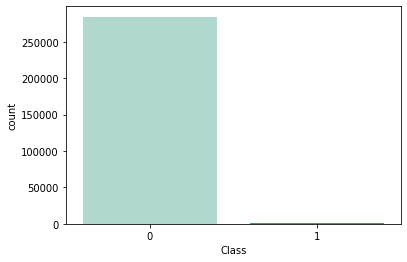

In [ ]:
print("number of non fraudulent data : ", data[data["Class"]==0].shape[0])
print("number of fraudulent data : ", data[data["Class"]==1].shape[0])

sns.countplot(x='Class',data=data,palette='BuGn')

###**Checking each variable distribution**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

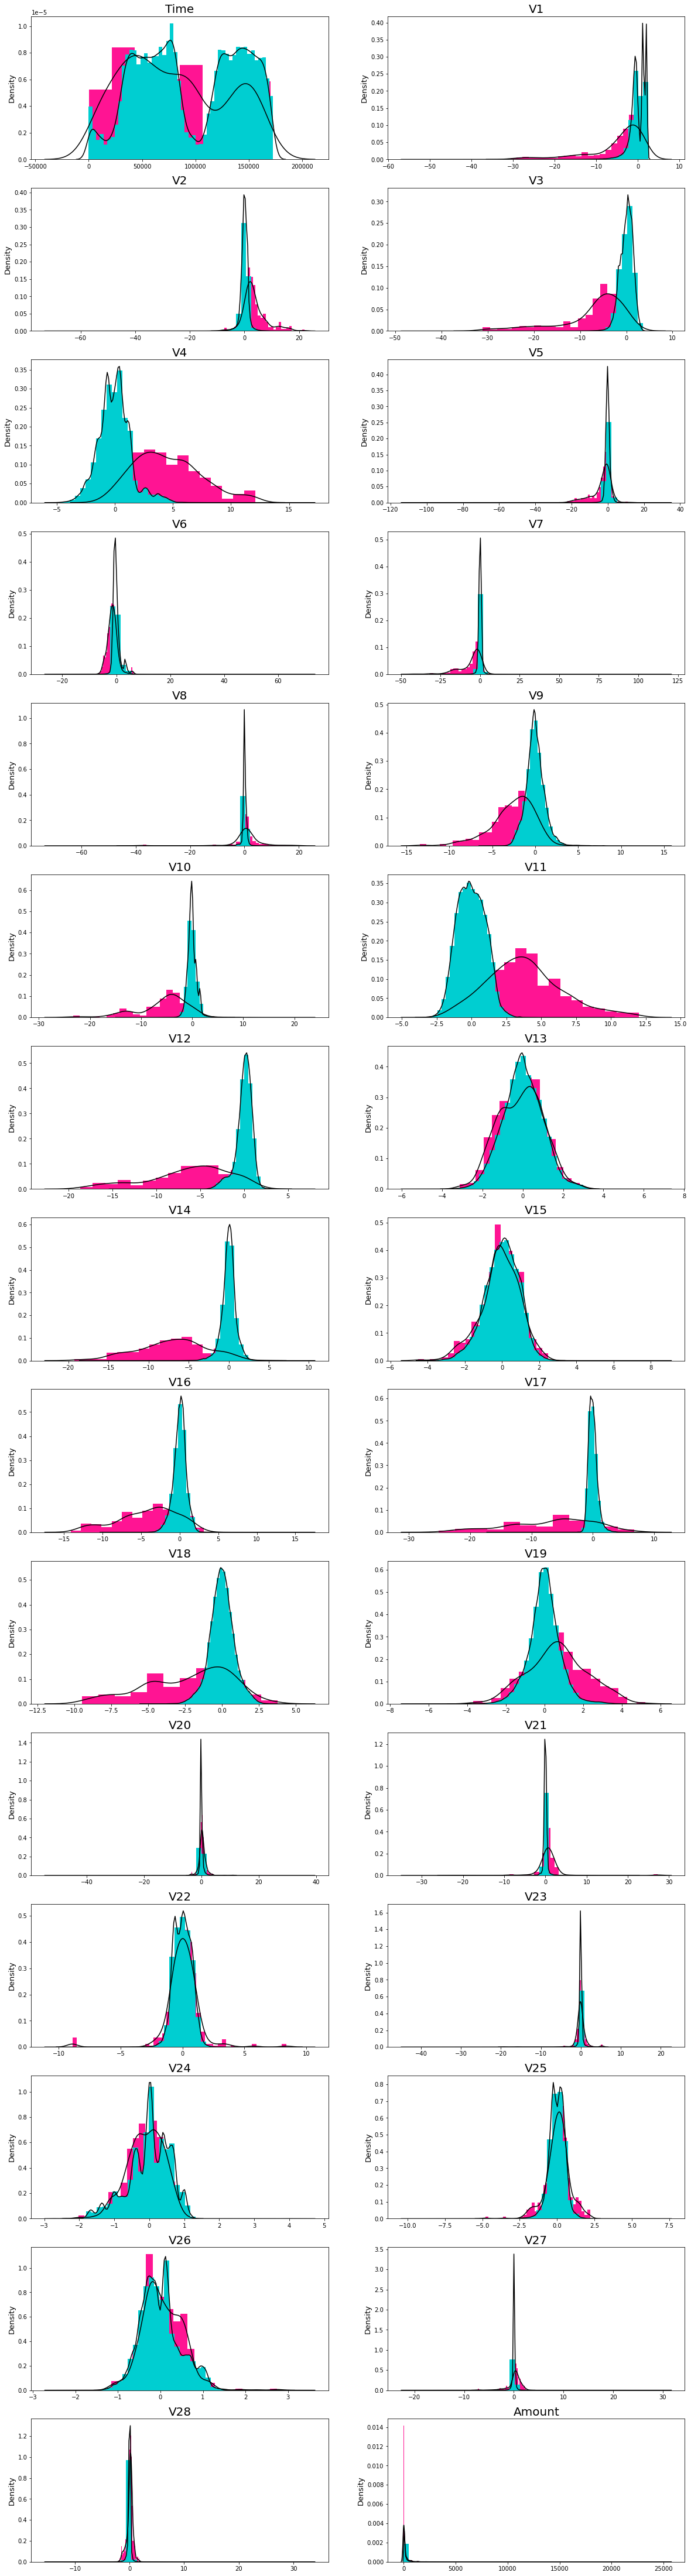

In [ ]:
columns = data.iloc[:,0:30].columns

frauds = data.Class == 1
normals = data.Class == 0

grid = gridspec.GridSpec(15, 2)
plt.figure(figsize=(20,20*4))

for n, col in enumerate(data[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(data[col][frauds], color='deeppink', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1)) 
    sns.distplot(data[col][normals],color='darkturquoise', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1))
    ax.set_ylabel('Density', fontsize=13)
    ax.set_title(str(col), fontsize=20)
    ax.set_xlabel('')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

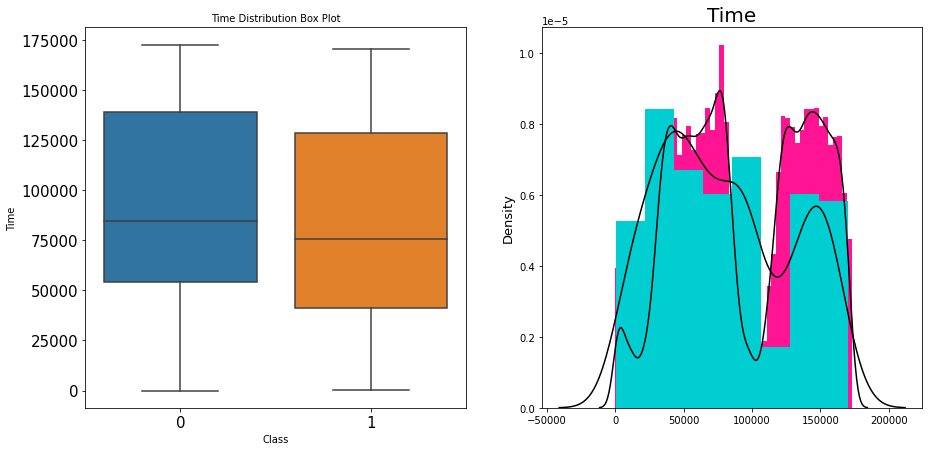

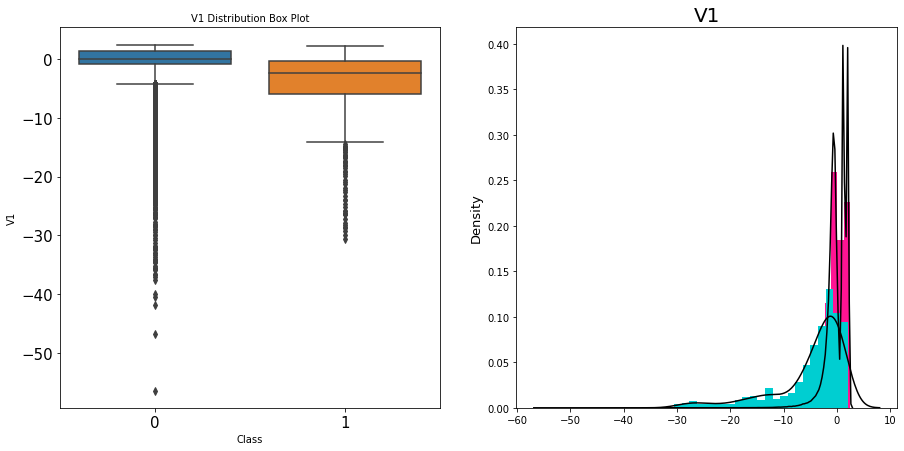

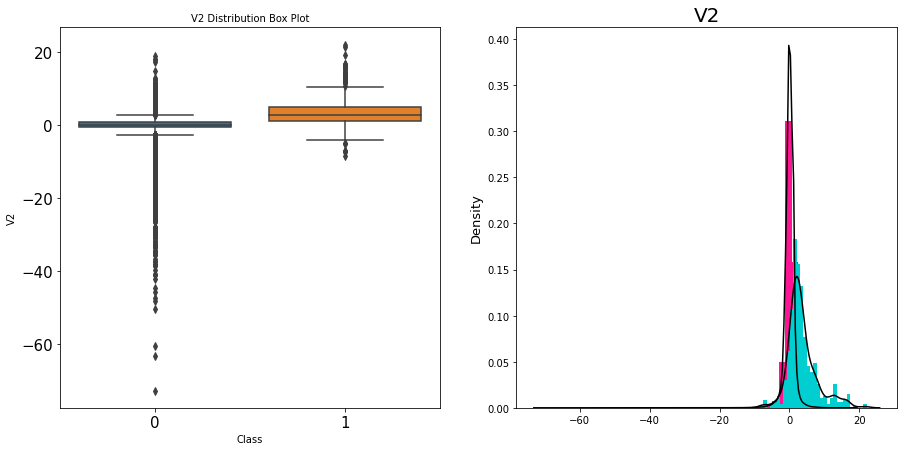

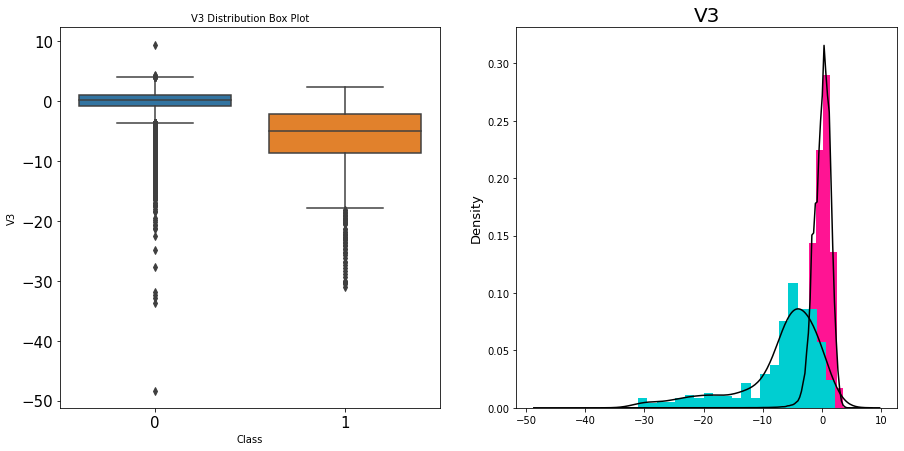

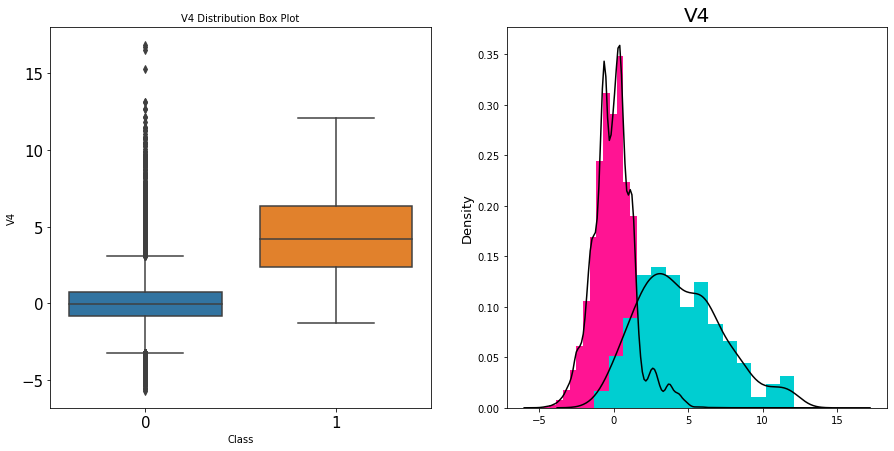

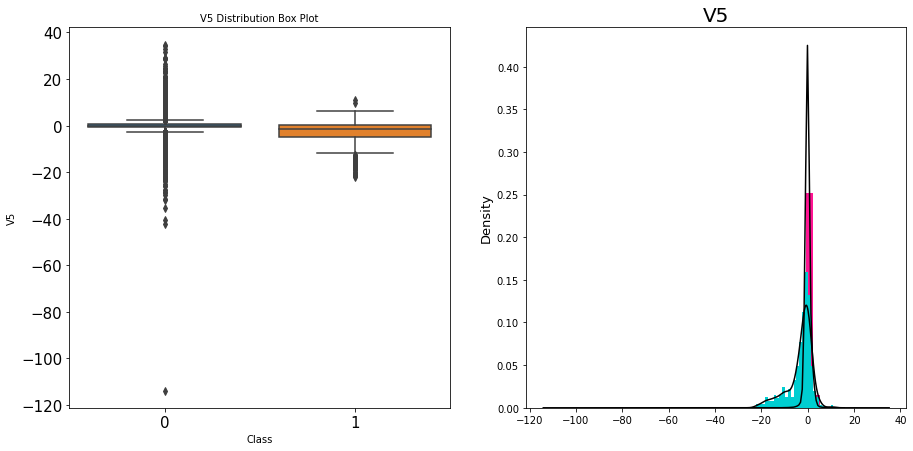

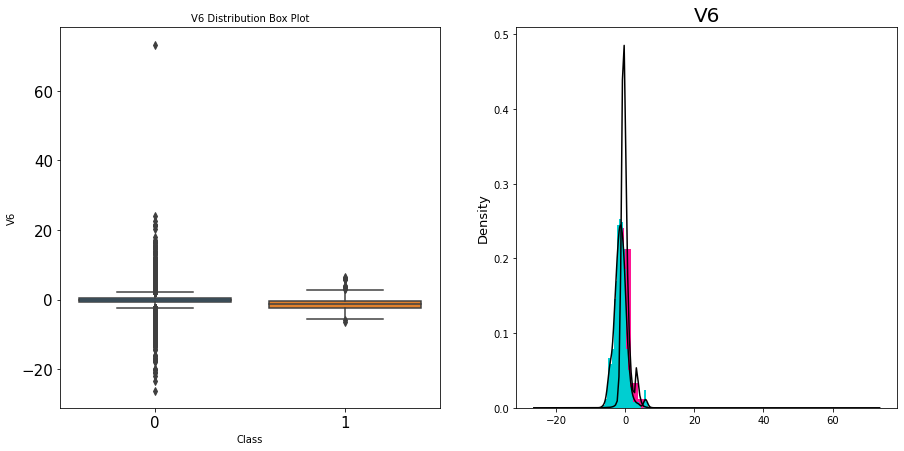

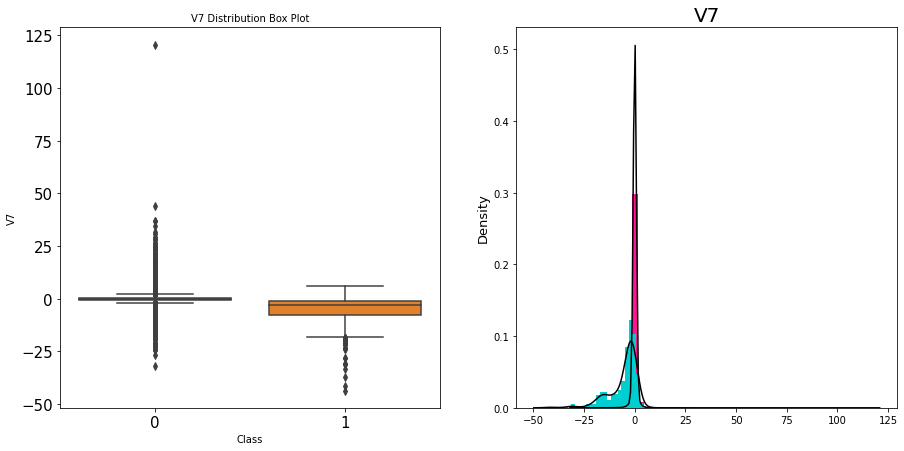

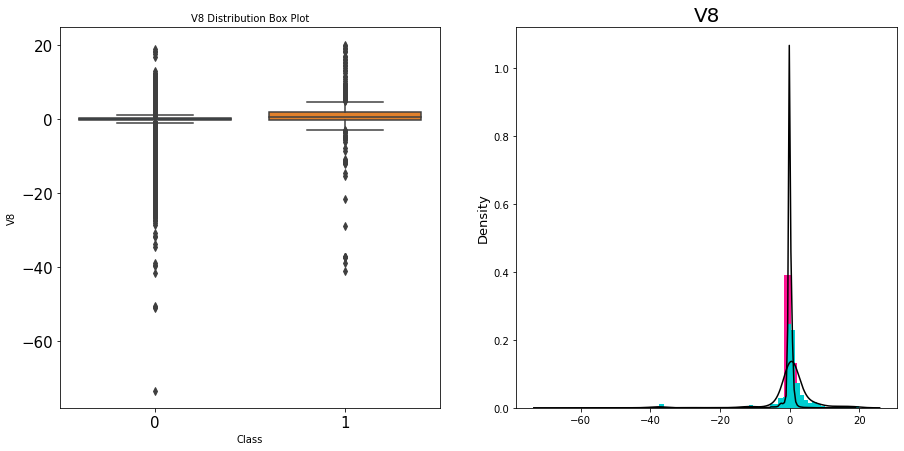

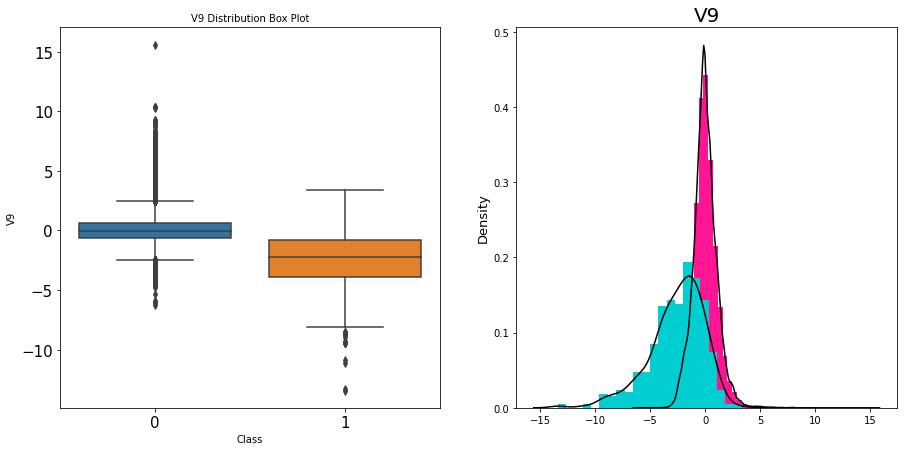

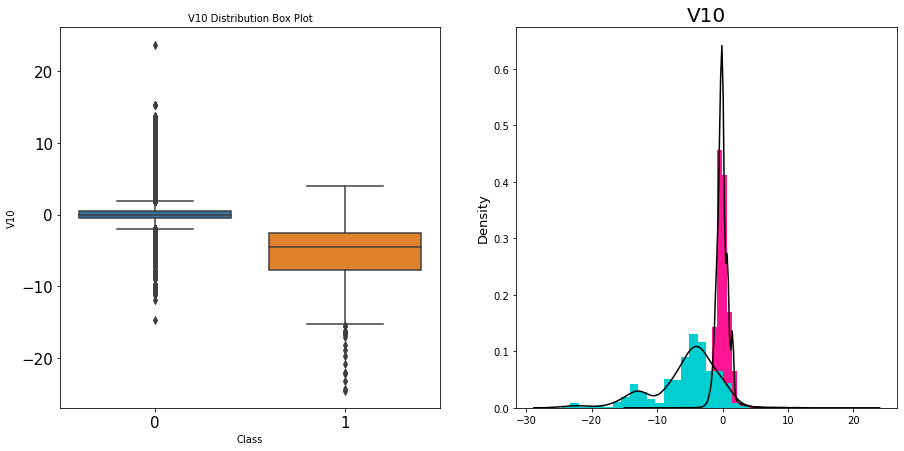

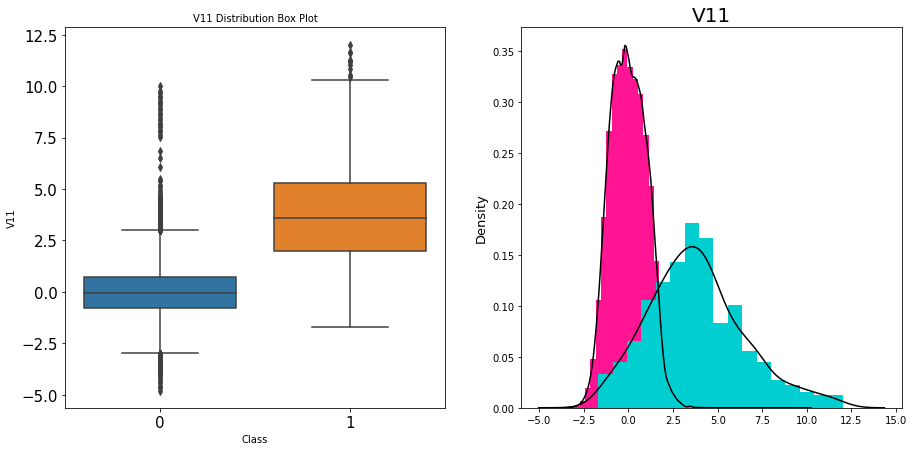

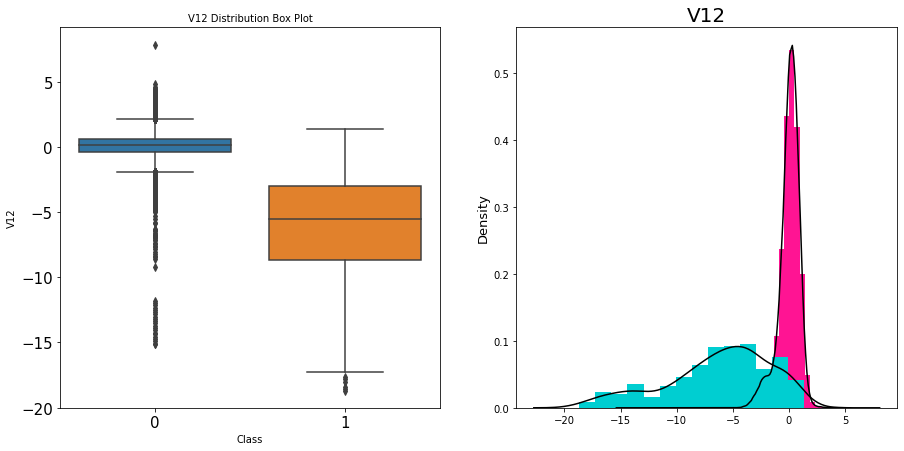

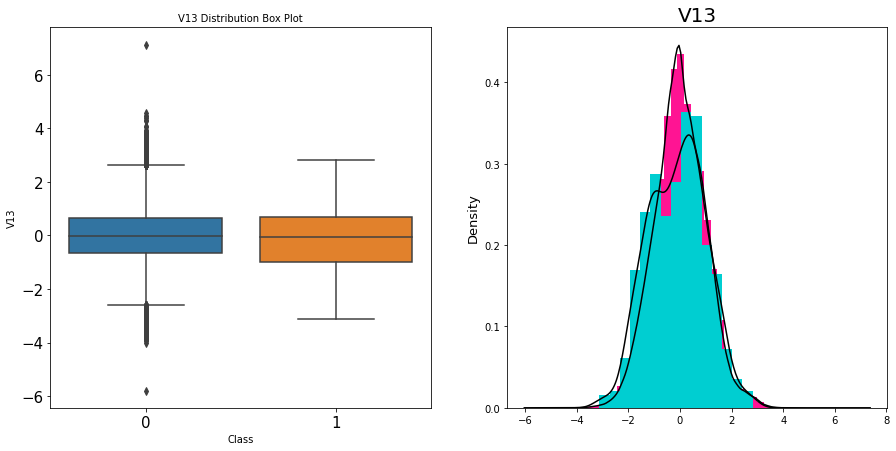

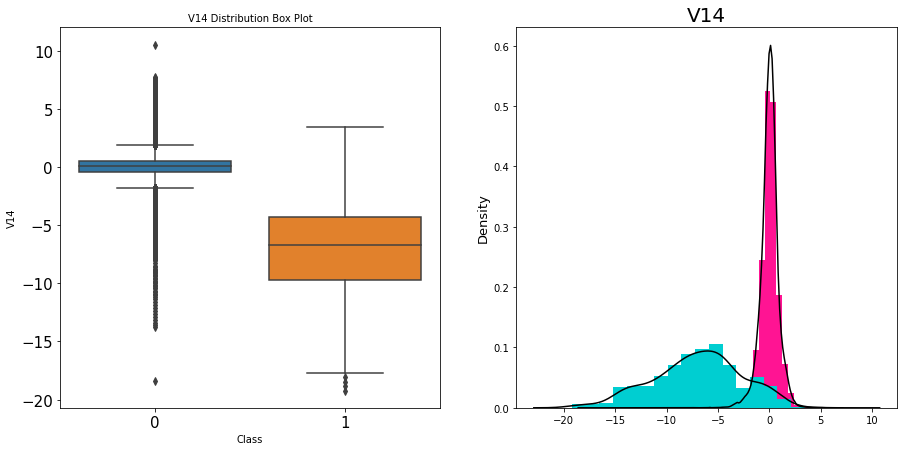

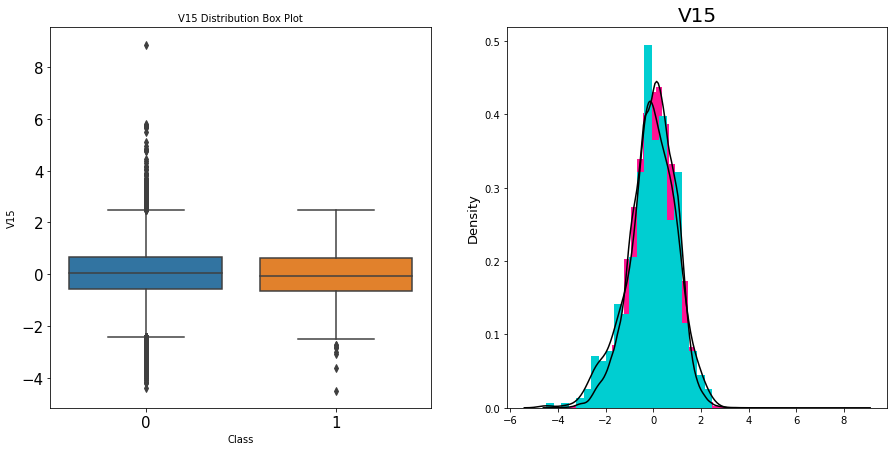

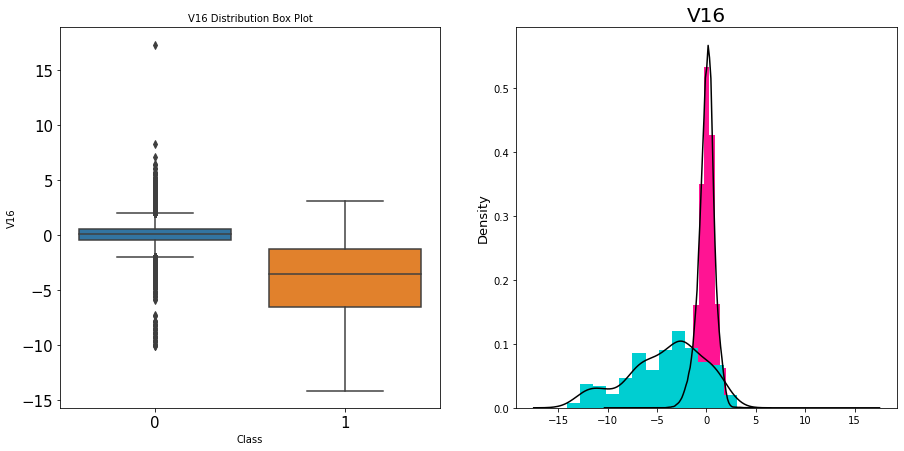

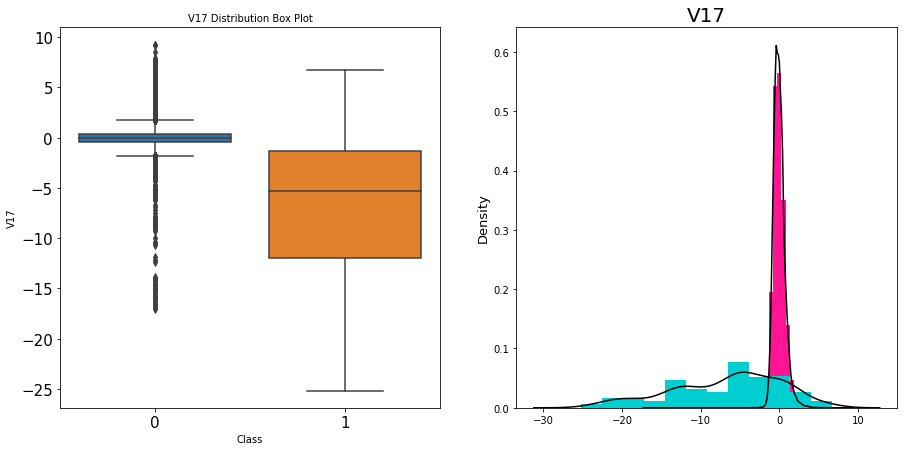

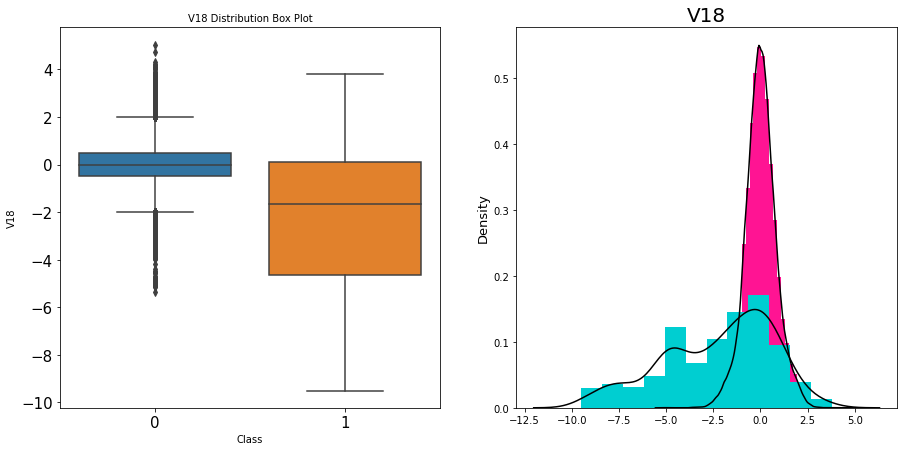

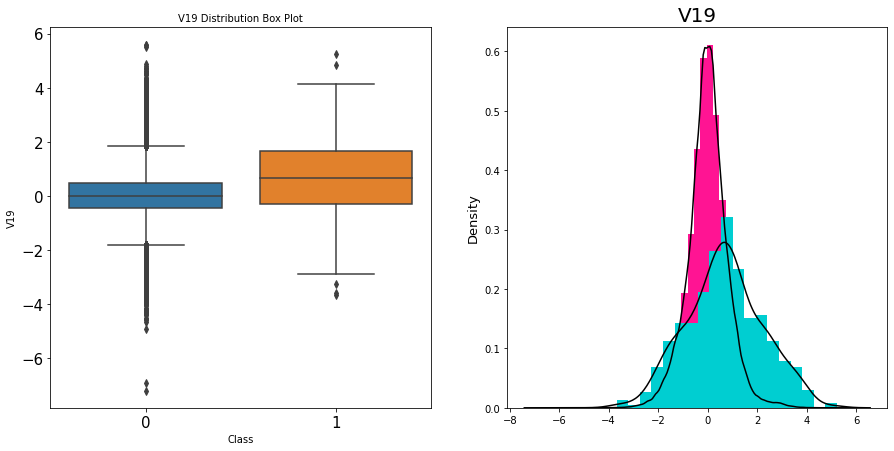

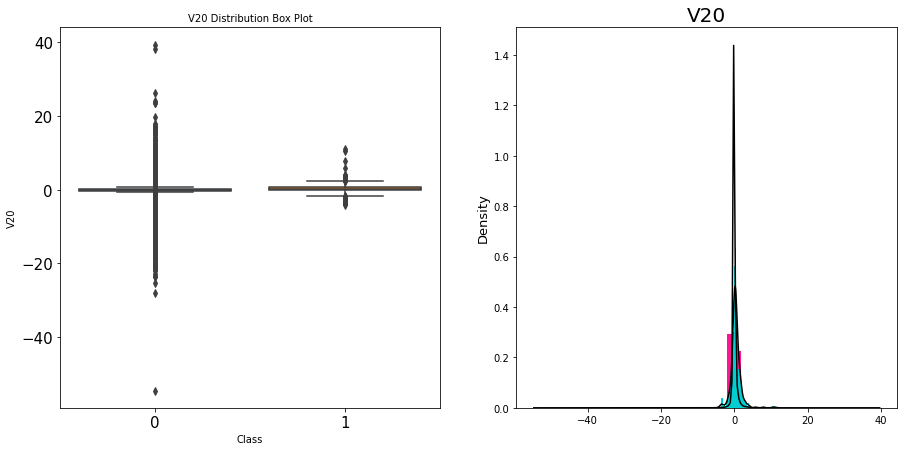

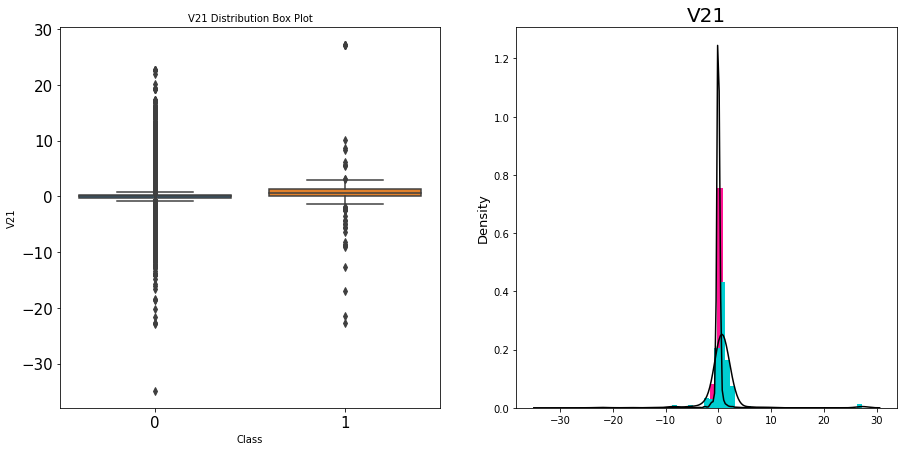

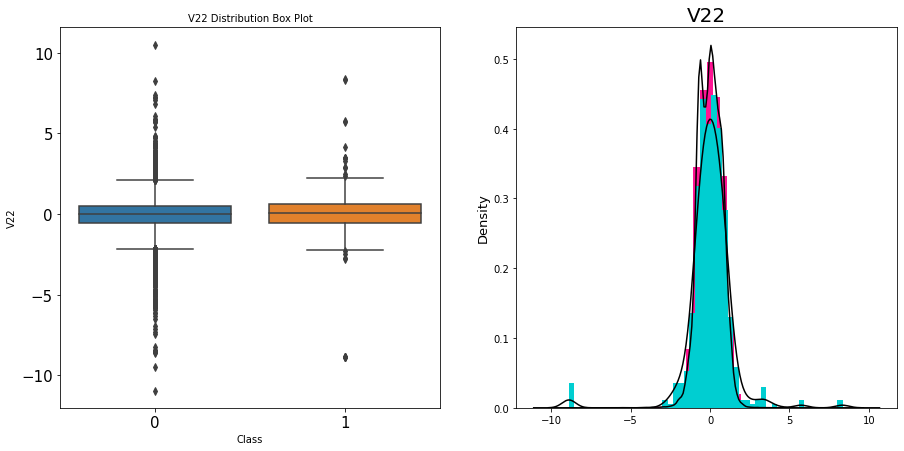

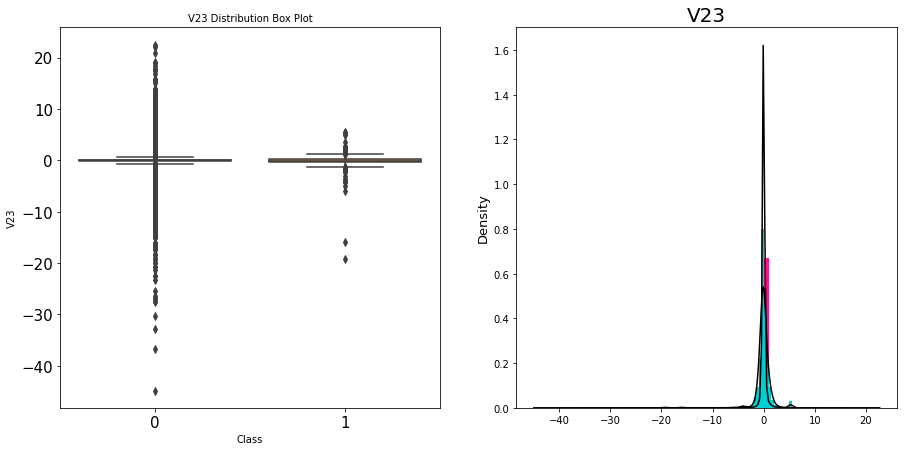

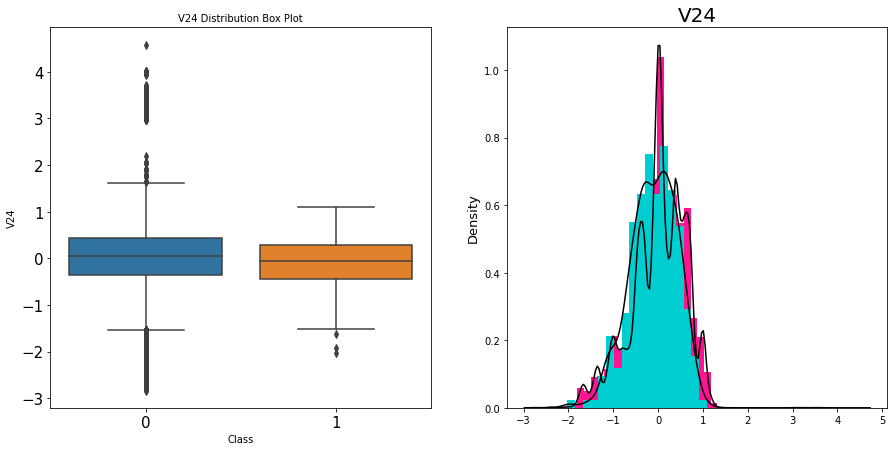

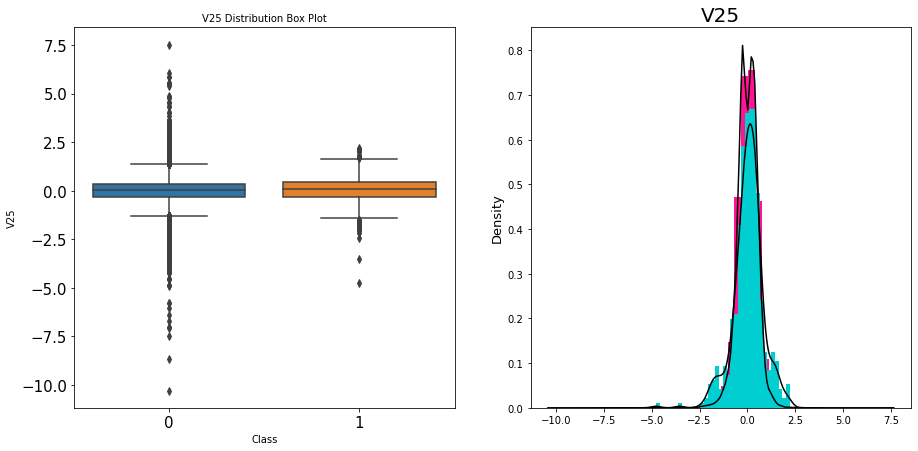

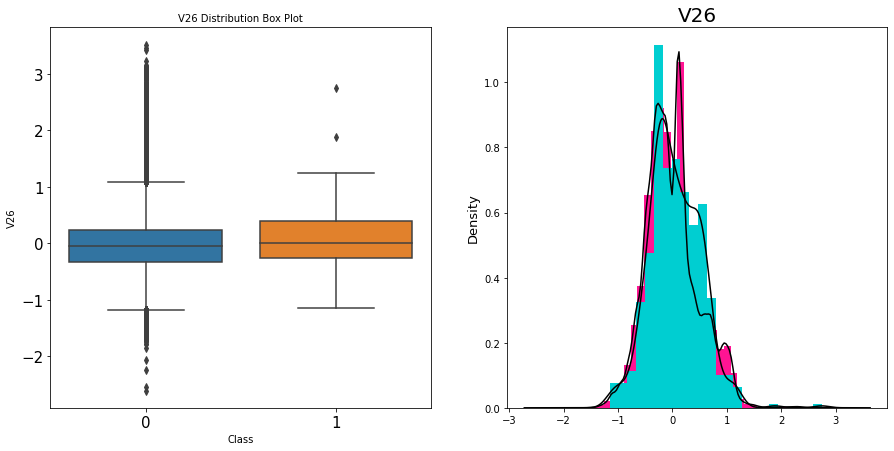

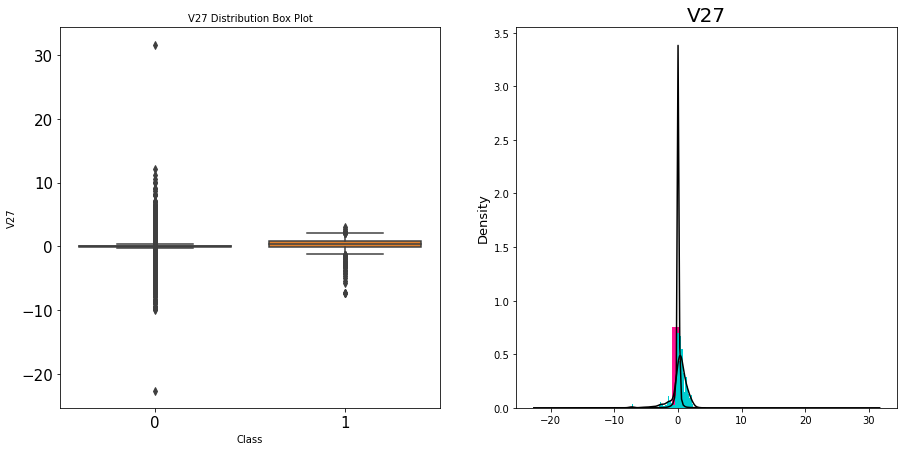

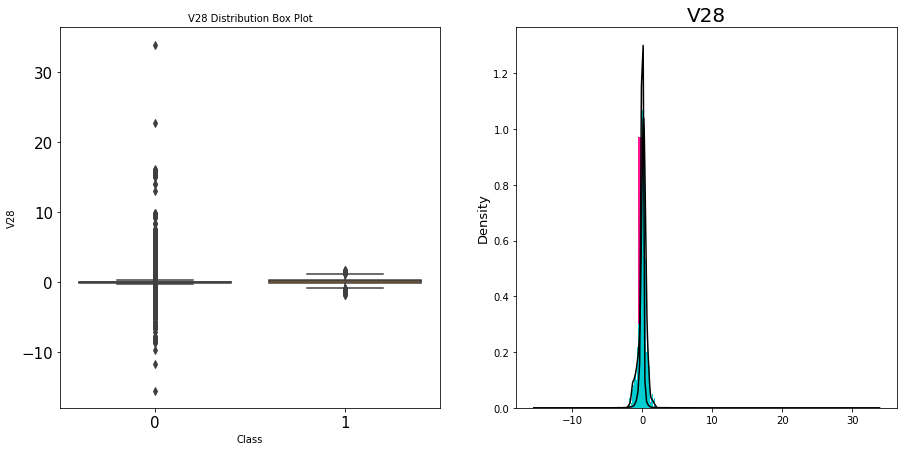

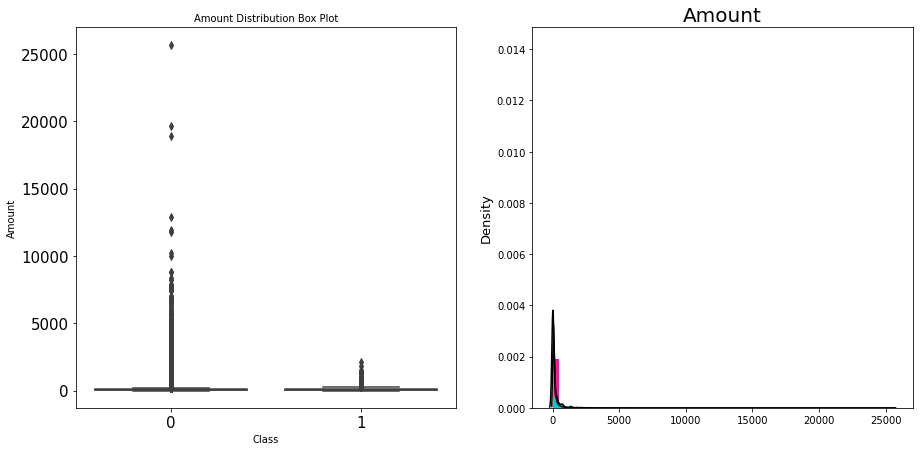

In [ ]:
normals = data.Class ==0
frauds  = data.Class == 1
for i, col in enumerate(data.drop(["Class"], axis=1).columns):

  fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 7))

  sns.boxplot(x = "Class",y=col, data = data, orient = 'v', ax = ax1)
  ax1.set_ylabel(col, fontsize=10)
  ax1.set_title(col + ' Distribution Box Plot', fontsize=10)
  ax1.tick_params(labelsize=15)

  sns.distplot(data[col][normals], color='deeppink', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1)) 
  sns.distplot(data[col][frauds],color='darkturquoise', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1))
  ax2.set_ylabel('Density', fontsize=13)
  ax2.set_title(str(col), fontsize=20)
  ax2.set_xlabel('')


## **Removing Outliers**

In [ ]:
Q3 = np.percentile(data['Amount'], 75)
Q1 = np.percentile(data['Amount'], 25)

# setting the cutoff
cutoff = 5.0

# computing the interquartile range
IQR = (Q3 - Q1)

# computing lower bound and upper bound
lower_bound = Q1 - (IQR * cutoff)
upper_bound = Q3 + (IQR * cutoff)

# creating a filter to remove values less than lower bound and greater than
# upper bound
filter_data = (data['Amount'] < lower_bound) | (data['Amount'] > upper_bound)

# filtering data
outliers = data[filter_data]['Amount']
fraud_outliers = data[(data['Class'] == 1) & filter_data]['Amount']
normal_outliers = data[(data['Class'] == 0) & filter_data]['Amount']

print(f"Total Number of Outliers : {outliers.count()}")
print(f"Number of Outliers in Fraudulent Class : {fraud_outliers.count()}")
print(f"No of Outliers in Normal Class : {normal_outliers.count()}")
print(f"Percentage of Fraud amount outliers : {round((fraud_outliers.count()/outliers.count())*100,2)}%")

Total Number of Outliers : 11366
Number of Outliers in Fraudulent Class : 41
No of Outliers in Normal Class : 11325
Percentage of Fraud amount outliers : 0.36%


### **Log transform for Amount and Time**

In [ ]:
data["Amount"]=np.log(data["Amount"]+0.001)
data["Time"]=np.log(data["Time"]+0.001)

## **Visualization after outlier and log transform**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

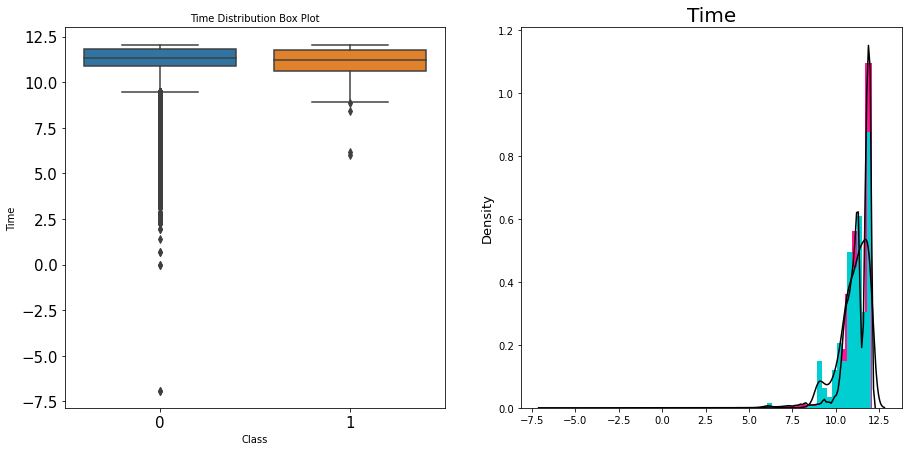

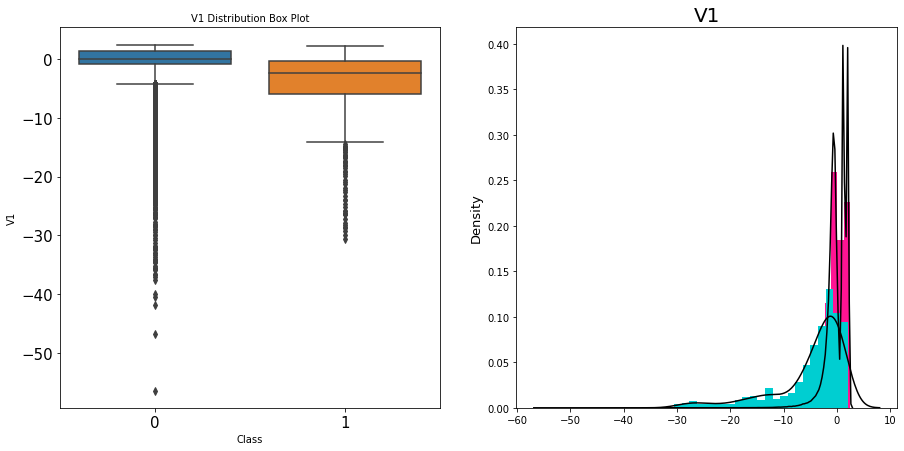

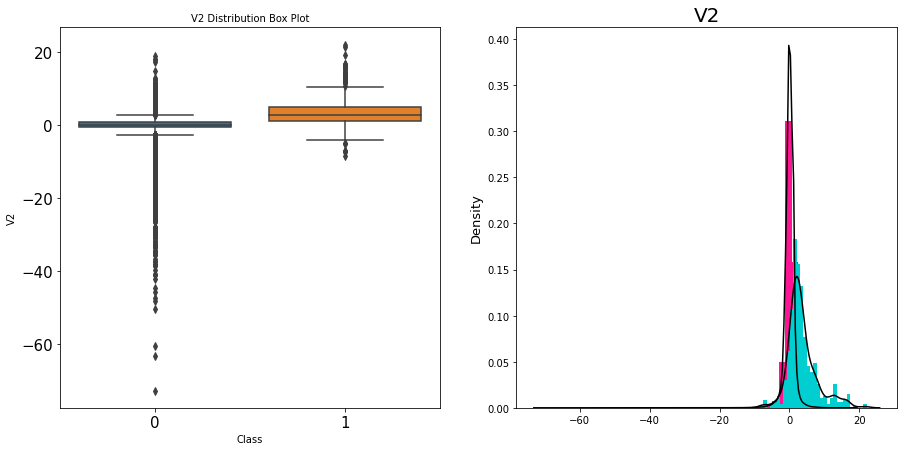

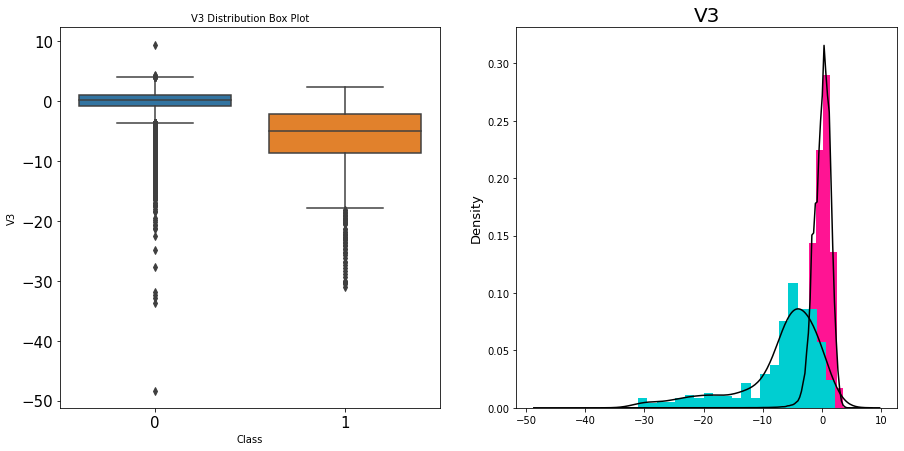

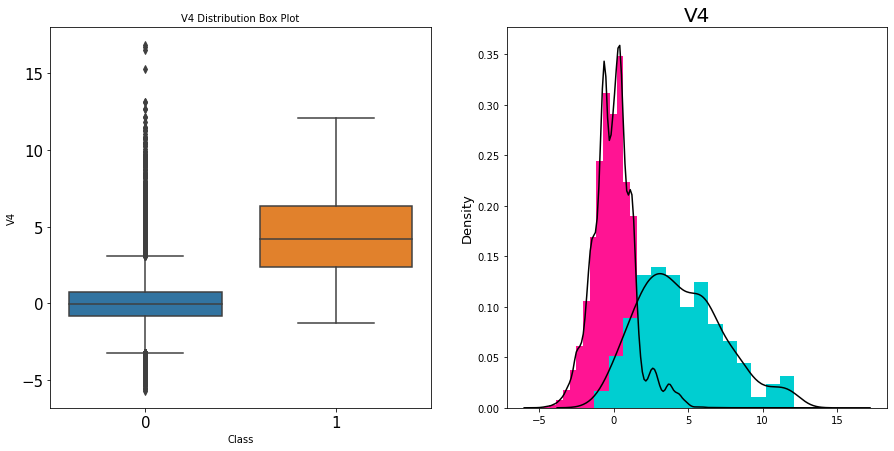

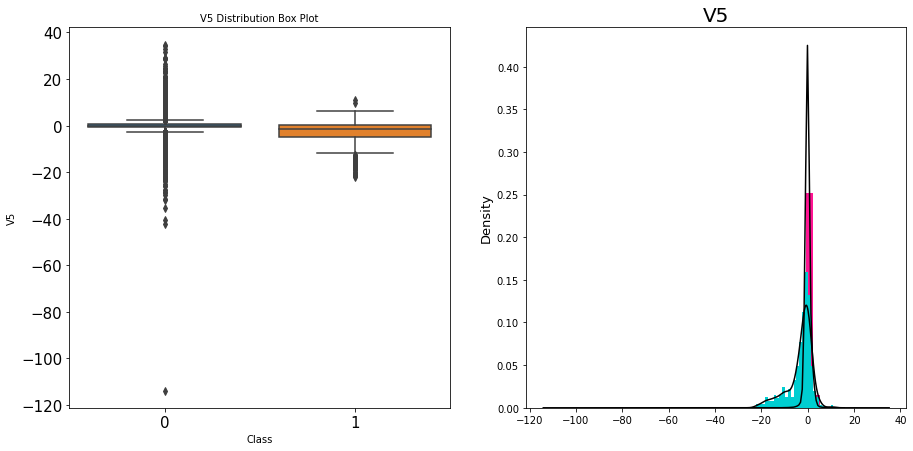

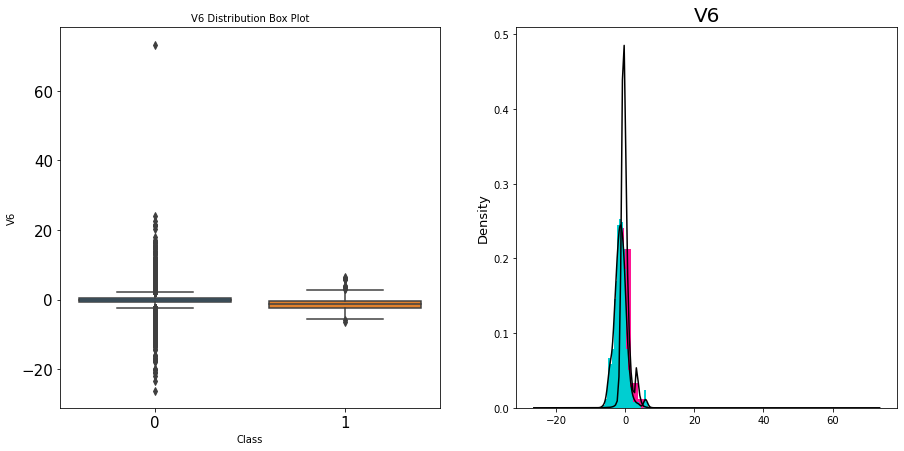

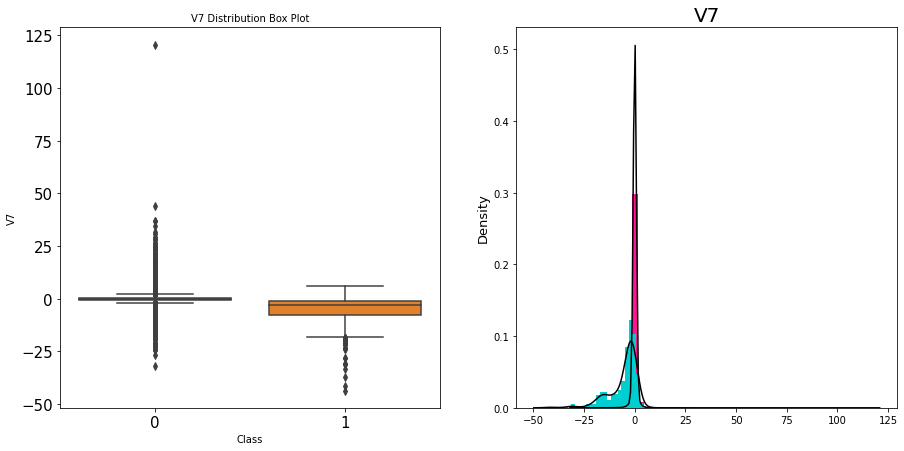

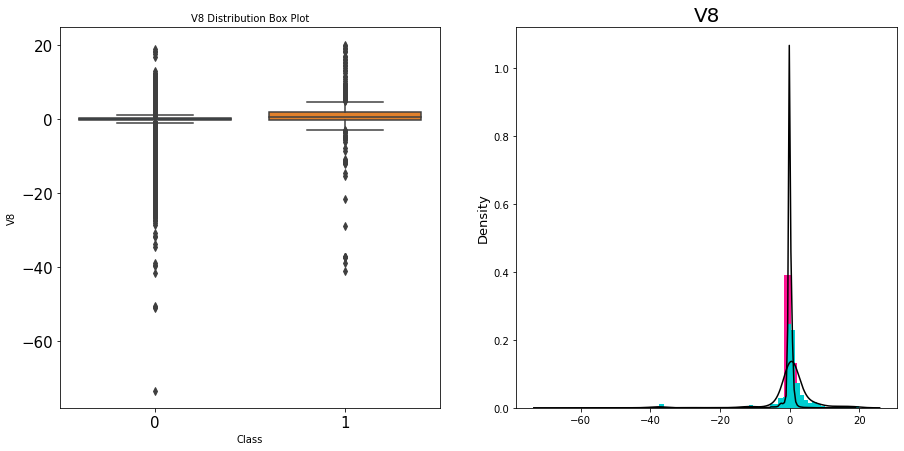

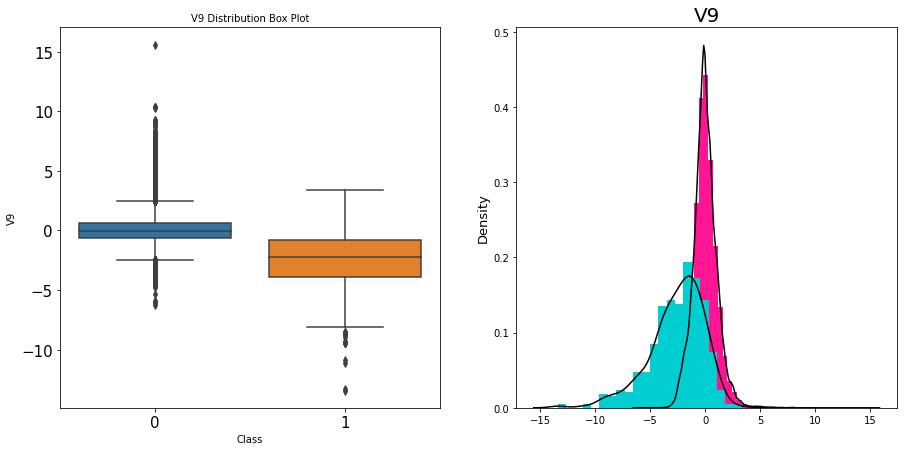

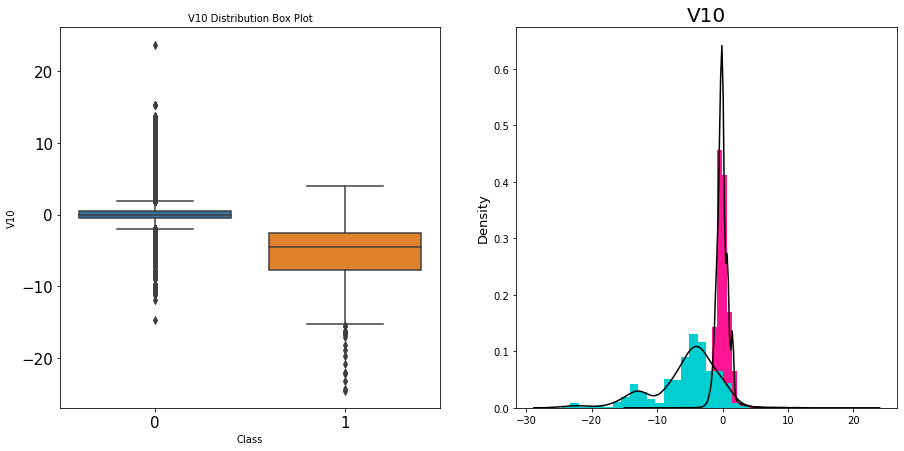

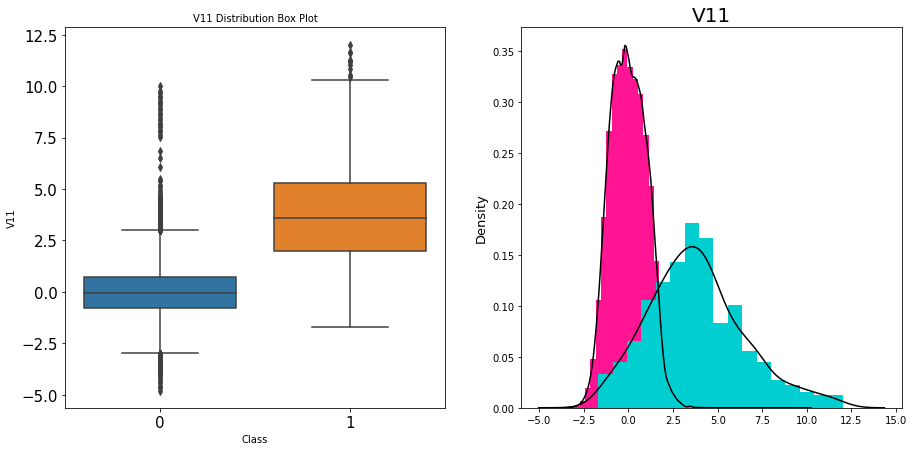

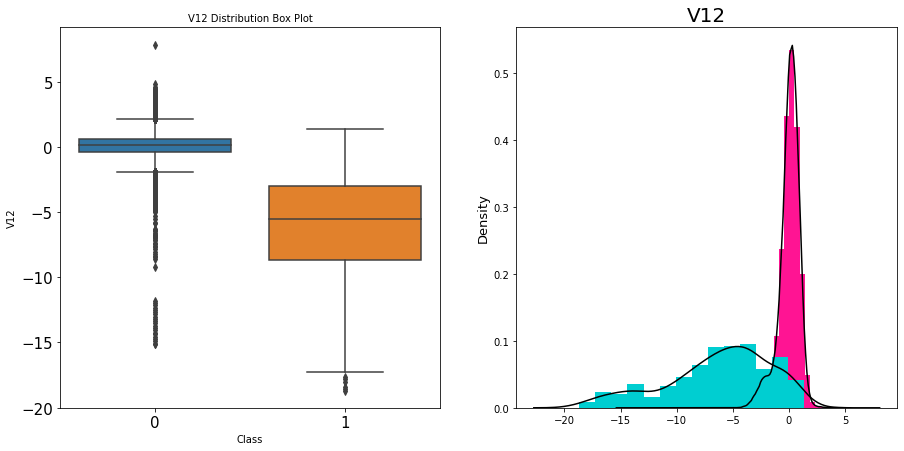

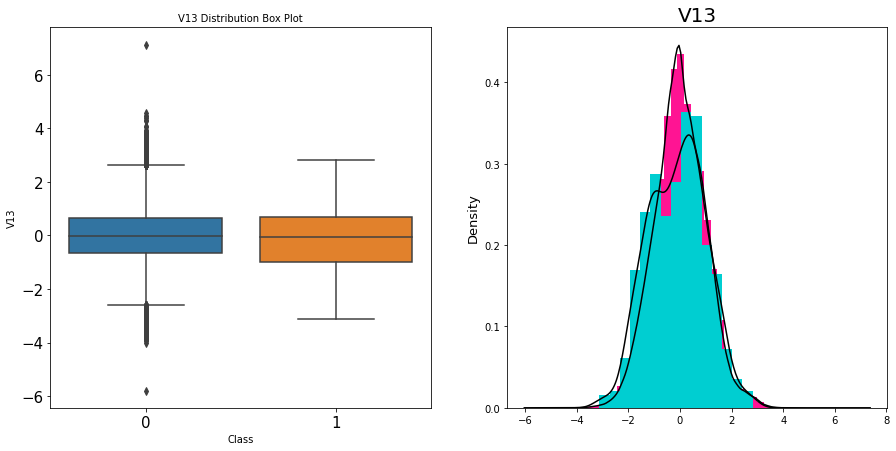

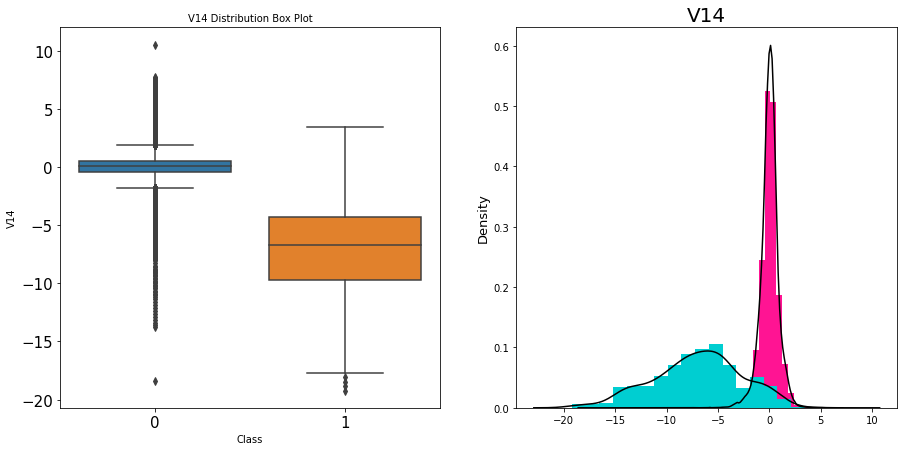

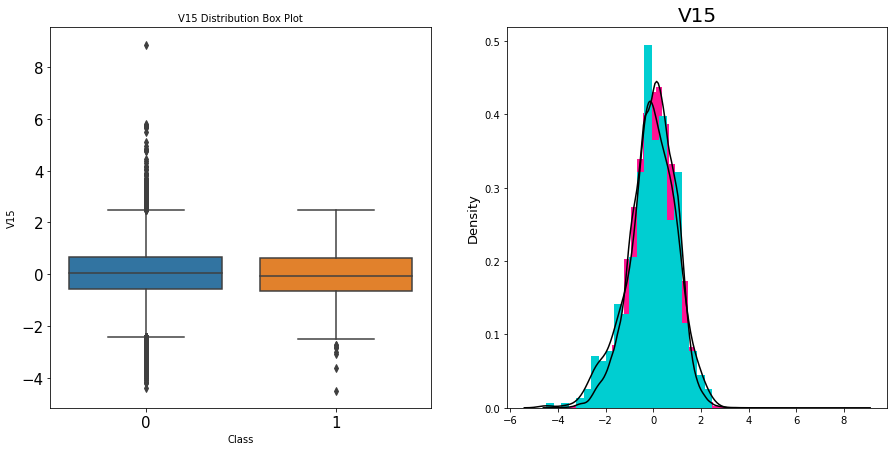

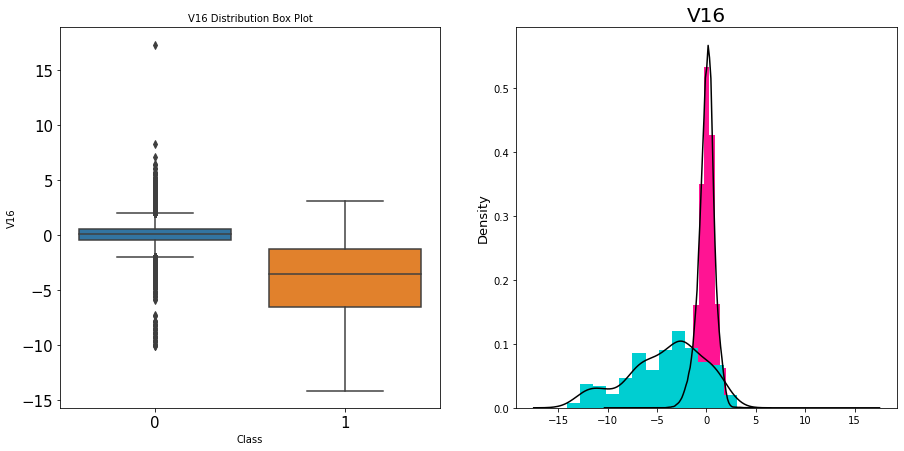

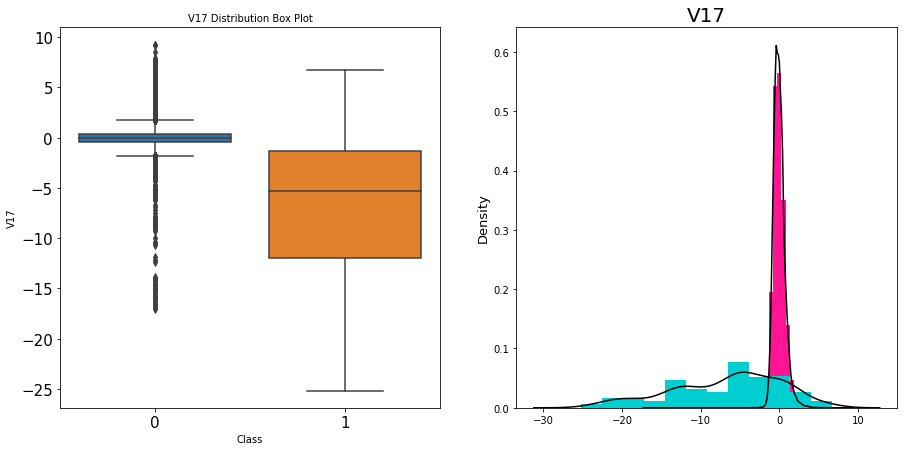

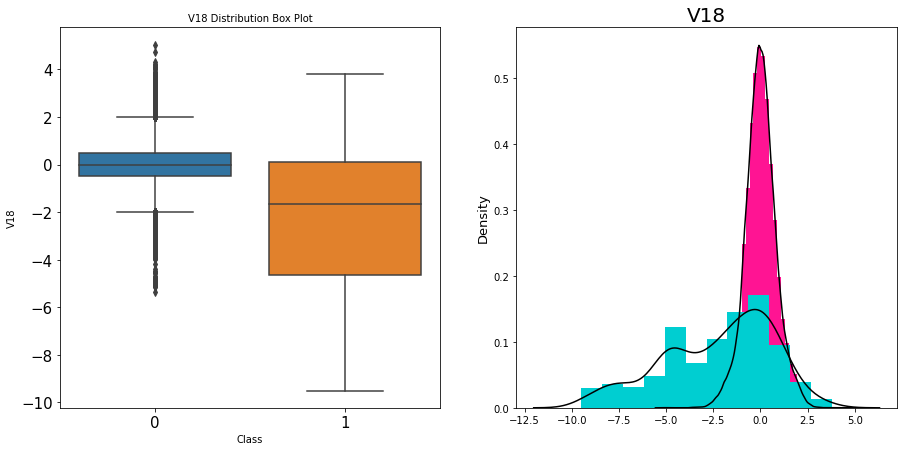

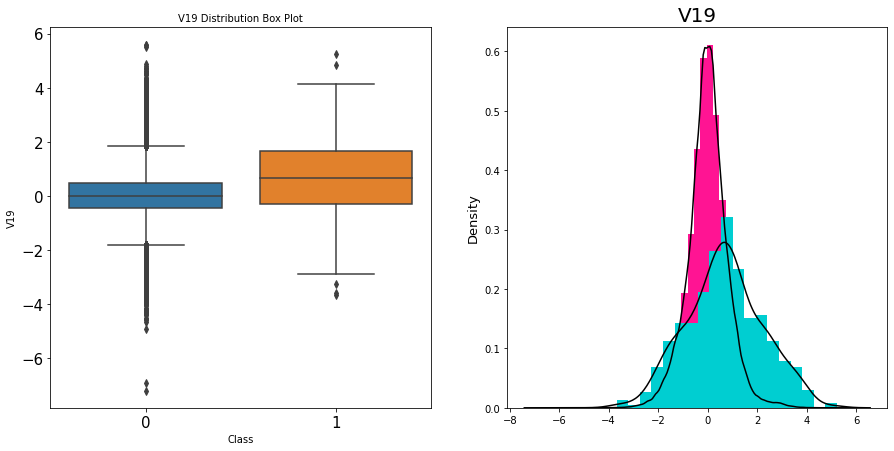

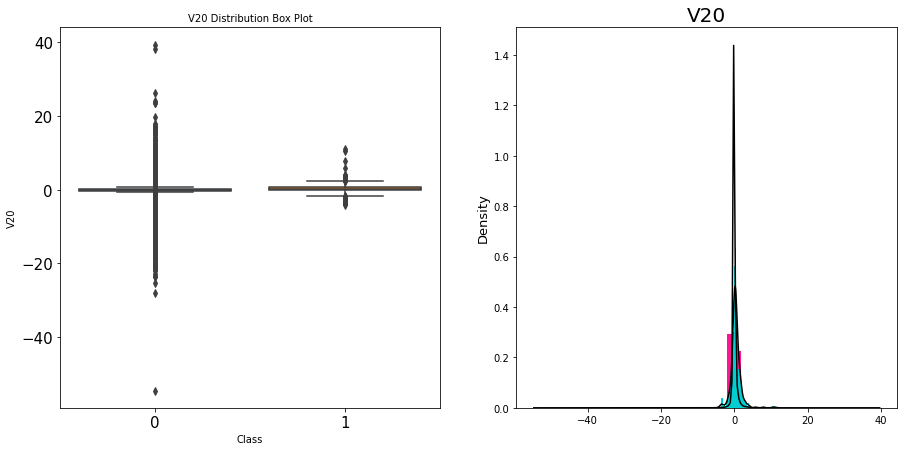

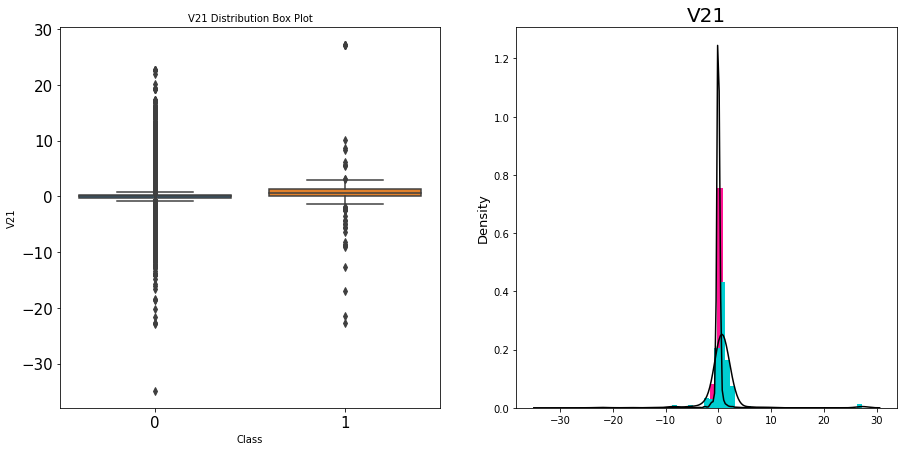

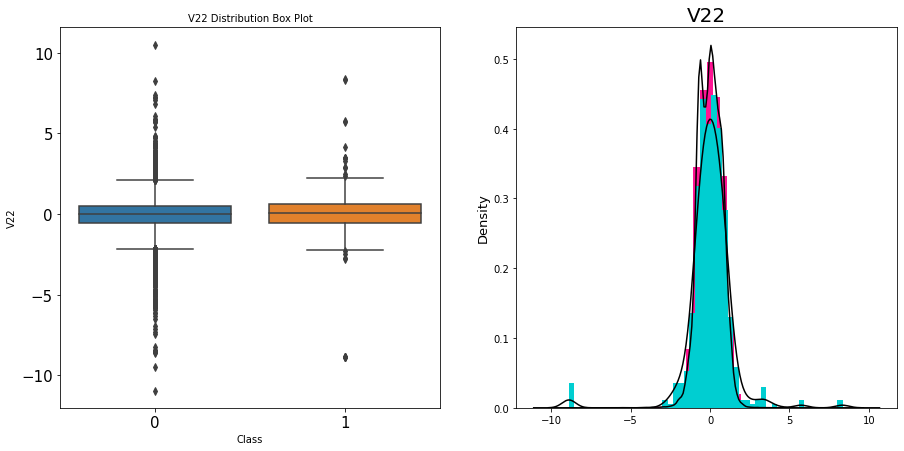

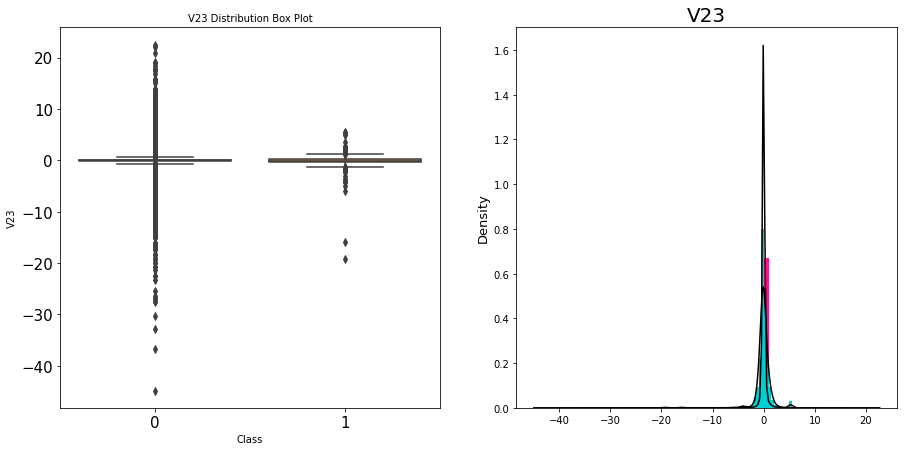

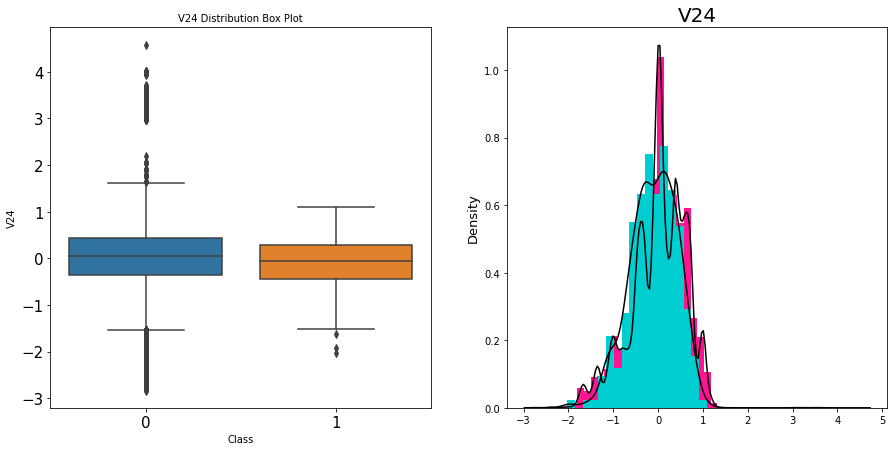

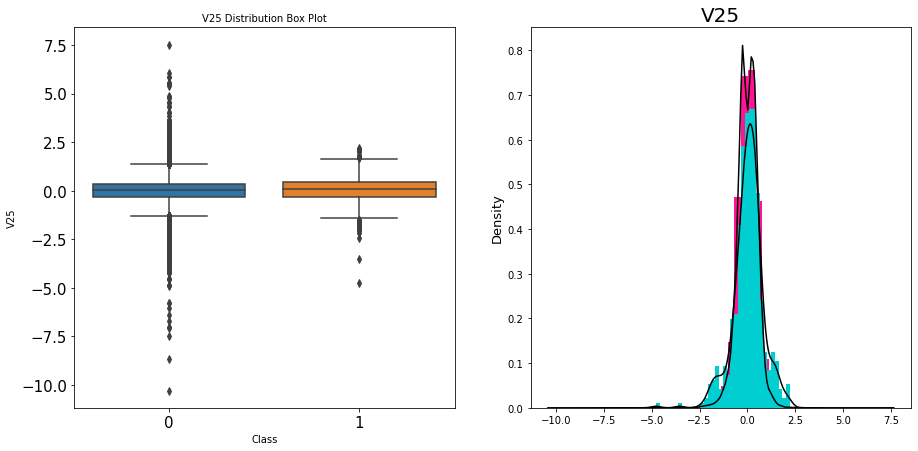

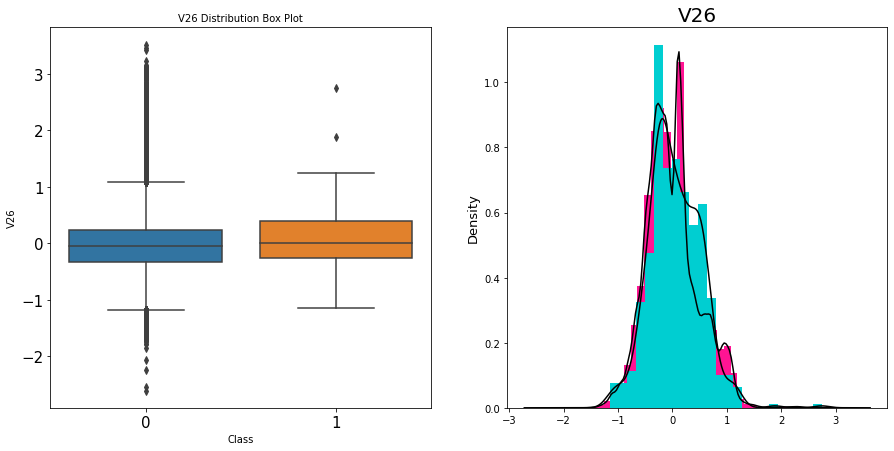

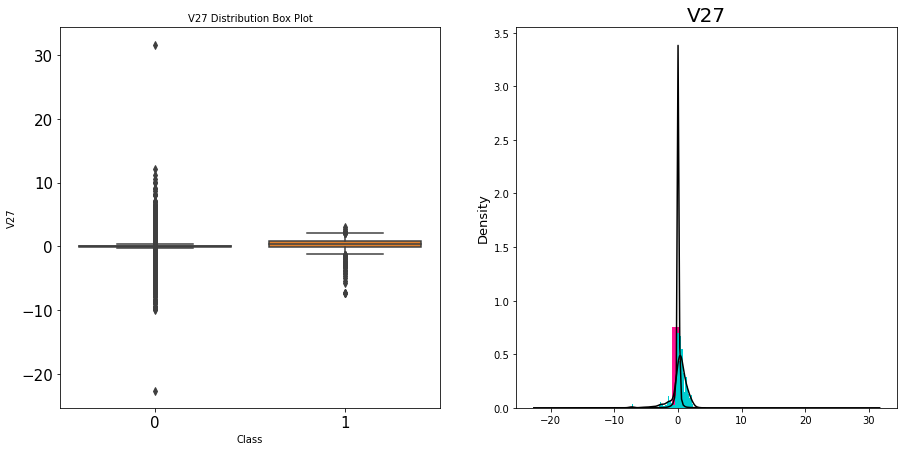

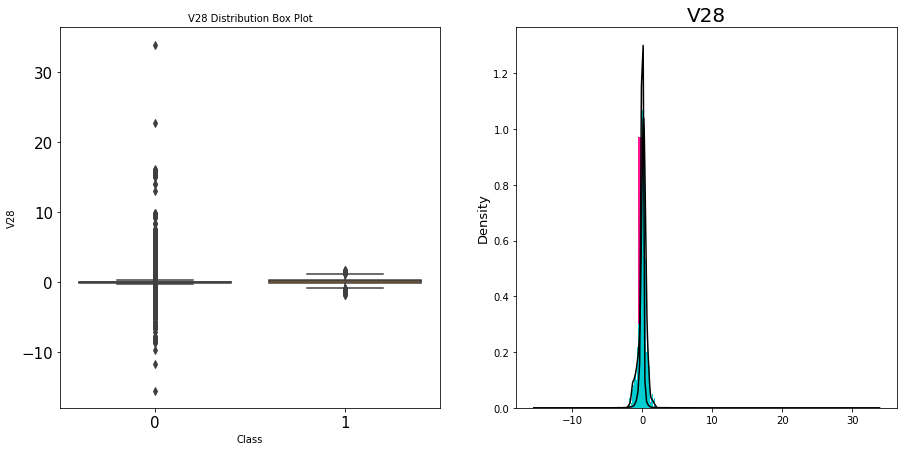

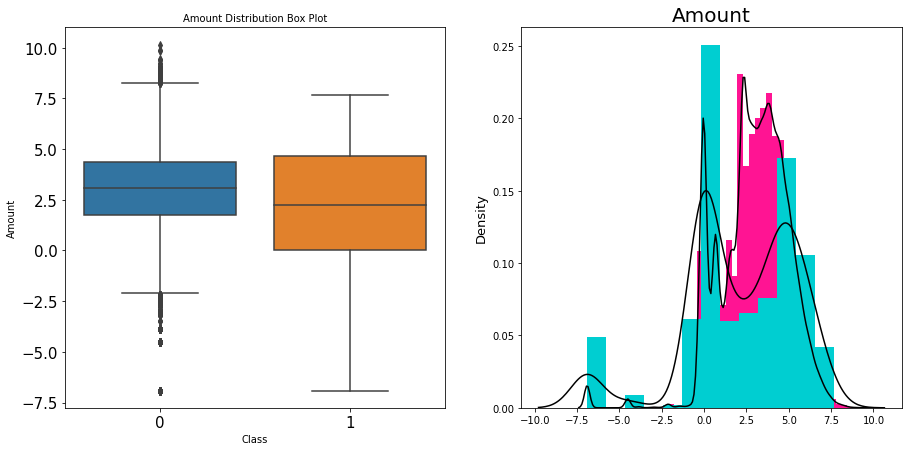

In [ ]:
frauds = data.Class == 1
normals = data.Class == 0
for i, col in enumerate(data.drop(["Class"], axis=1).columns):

  fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 7))

  sns.boxplot(x = "Class",y=col, data = data, orient = 'v', ax = ax1)
  ax1.set_ylabel(col, fontsize=10)
  ax1.set_title(col + ' Distribution Box Plot', fontsize=10)
  ax1.tick_params(labelsize=15)

  sns.distplot(data[col][normals], color='deeppink', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1)) 
  sns.distplot(data[col][frauds],color='darkturquoise', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1))
  ax2.set_ylabel('Density', fontsize=13)
  ax2.set_title(str(col), fontsize=20)
  ax2.set_xlabel('')



## **splitting data**

In [ ]:
final_y=data["Class"]

In [ ]:
X_train_enc, X_test_enc = train_test_split(data, test_size=0.2)
X_train_enc, X_val_enc = train_test_split(X_train_enc, test_size=0.2)


y_train_enc = X_train_enc.pop('Class')
y_val_enc  = X_val_enc.pop('Class')
y_test_enc  = X_test_enc.pop('Class')

## **scaling** (only time and Amount)

In [ ]:
robust_scaler = RobustScaler()
X_train_enc["Time"] = robust_scaler.fit_transform(X_train_enc["Time"].values.reshape(-1,1))
X_val_enc["Time"] = robust_scaler.transform(X_val_enc["Time"].values.reshape(-1,1))
X_test_enc["Time"] = robust_scaler.transform(X_test_enc["Time"].values.reshape(-1,1))

X_train_enc["Amount"] = robust_scaler.fit_transform(X_train_enc["Amount"].values.reshape(-1,1))
X_val_enc["Amount"] = robust_scaler.transform(X_val_enc["Amount"].values.reshape(-1,1))
X_test_enc["Amount"] = robust_scaler.transform(X_test_enc["Amount"].values.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## **Feature selection**

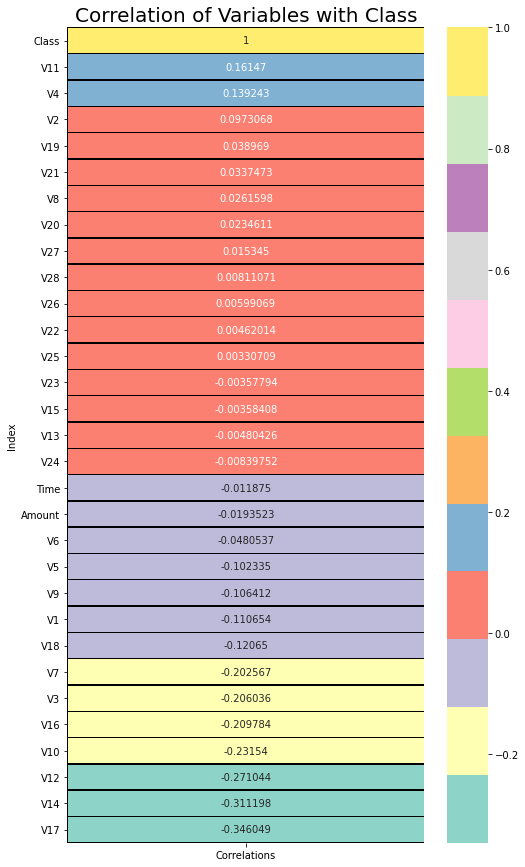

In [ ]:
X_train_enc["Class"]=y_train_enc
corr = X_train_enc.corrwith(X_train_enc['Class']).reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
X_train_enc.drop("Class",axis=1,inplace=True)

plt.figure(figsize=(8, 15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linewidths=0.4, linecolor='black')

plt.title("Correlation of Variables with Class", fontsize=20)
plt.show()

In [ ]:
column_to_drop= corr[~(corr["Correlations"].abs()>= 0.09)].index.tolist()
print(column_to_drop)

['V19', 'V21', 'V8', 'V20', 'V27', 'V28', 'V26', 'V22', 'V25', 'V23', 'V15', 'V13', 'V24', 'Time', 'Amount', 'V6']


In [ ]:
X_train_enc.drop(column_to_drop,1,inplace=True)
X_val_enc.drop(column_to_drop,1,inplace=True)
X_test_enc.drop(column_to_drop,1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##**Resampling**


In [ ]:
#Random undersampling
X_rus_enc, y_rus_enc, _=  underSampling(X_train_enc,y_train_enc)


#Random oversampling
X_ros_enc, y_ros_enc, _= overSampling(X_train_enc,y_train_enc)


#tomeklinks
X_tom_enc, y_tom_enc, _=  tomekLinks(X_train_enc,y_train_enc)


#SMOTE
X_smt_enc, y_smt_enc =   smote(X_train_enc,y_train_enc)

#Adasyn
X_ads_enc, y_ads_enc =   adasyn(X_train_enc,y_train_enc)

#SMOTE + tomeklinks
X_smtom_enc, y_smtom_enc=   smote_plus_tomek(X_train_enc,y_train_enc)

#ROS + tomeklinks
X_rostom_enc, y_rostom_enc,_=   overAndTomeLinks(X_train_enc,y_train_enc)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


181636 new random picked points


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Removed indexes: [     0      1      2 ... 291126 291127 291128]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#**Models**

In [ ]:


METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(input_shape, metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
    
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(input_shape,)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

##CNN model
def make_cnn_model(input_shape,
                    metrics=METRICS,  output_bias=None):

    model = keras.Sequential([
      keras.layers.Convolution1D(
          filters=32, kernel_size=3, activation='relu',
          input_shape=(input_shape, 1)),
      keras.layers.Convolution1D(
          filters=32, kernel_size=3, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.MaxPooling1D(pool_size=2),
      keras.layers.Flatten(),
      keras.layers.Dense(64, activation="relu"),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])
    model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=1e-3), metrics=metrics)
    return model
EPOCHS = 1000
BATCH_SIZE = 2048
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=30,
    mode='max',
    restore_best_weights=True)

##**withoout resampling**

###**Base**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_model(X_train_enc.shape[-1])
history = model.fit(
    X_train_enc,
    y_train_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
90/90 [==============================] - 3s 19ms/step - loss: 1.2761 - tp: 163.3077 - fp: 77887.2857 - tn: 72967.8901 - fn: 84.0879 - accuracy: 0.5272 - precision: 0.0031 - recall: 0.6882 - auc: 0.7239 - val_loss: 0.7115 - val_tp: 29.0000 - val_fp: 24088.0000 - val_tn: 21396.0000 - val_fn: 56.0000 - val_accuracy: 0.4702 - val_precision: 0.0012 - val_recall: 0.3412 - val_auc: 0.3379
Epoch 2/1000
90/90 [==============================] - 1s 10ms/step - loss: 0.6925 - tp: 47.5934 - fp: 39282.5934 - tn: 54687.7143 - fn: 122.6703 - accuracy: 0.5502 - precision: 0.0011 - recall: 0.2724 - auc: 0.3279 - val_loss: 0.3134 - val_tp: 3.0000 - val_fp: 723.0000 - val_tn: 44761.0000 - val_fn: 82.0000 - val_accuracy: 0.9823 - val_precision: 0.0041 - val_recall: 0.0353 - val_auc: 0.3199
Epoch 3/1000
90/90 [==============================] - 1s 9ms/step - loss: 0.3872 - tp: 42.9890 - fp: 16836.8462 - tn: 77133.7363 - fn: 127.0000 - accuracy: 0.8084 - precision: 0.0025 - recall: 0.2553 - auc: 

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.006729505956172943
tp :  50.0
fp :  11.0
tn :  56864.0
fn :  37.0
accuracy :  0.9991573095321655
precision :  0.8196721076965332
recall :  0.5747126340866089
auc :  0.8705865740776062



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.82      0.57      0.68        87

    accuracy                           1.00     56962
   macro avg       0.91      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



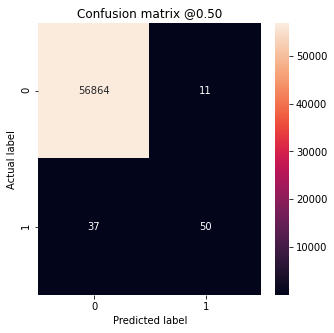

In [ ]:
base_test_pred = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred)
a = base_test_pred > 0.5
print(classification_report(y_test_enc, a))

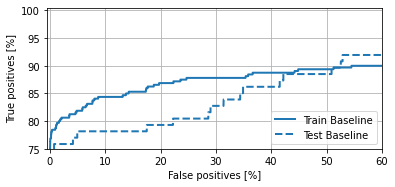

In [ ]:
base_train_pred = model.predict(X_train_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_train_enc, base_train_pred, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

### **CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_train_enc.shape[-1])
history = model.fit(
    X_train_enc.to_numpy().reshape(len(X_train_enc),X_train_enc.shape[-1],1),
    y_train_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
90/90 [==============================] - 7s 58ms/step - loss: 0.2901 - tp: 50.0000 - fp: 8718.6154 - tn: 142136.5604 - fn: 197.3956 - accuracy: 0.9332 - precision: 0.0059 - recall: 0.2454 - auc: 0.5660 - val_loss: 0.0293 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45484.0000 - val_fn: 85.0000 - val_accuracy: 0.9981 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.2894
Epoch 2/1000
90/90 [==============================] - 4s 49ms/step - loss: 0.0215 - tp: 0.5385 - fp: 0.0330 - tn: 93970.2747 - fn: 169.7253 - accuracy: 0.9982 - precision: 0.2242 - recall: 0.0018 - auc: 0.5155 - val_loss: 0.0102 - val_tp: 11.0000 - val_fp: 2.0000 - val_tn: 45482.0000 - val_fn: 74.0000 - val_accuracy: 0.9983 - val_precision: 0.8462 - val_recall: 0.1294 - val_auc: 0.8564
Epoch 3/1000
90/90 [==============================] - 4s 49ms/step - loss: 0.0088 - tp: 67.3297 - fp: 13.0989 - tn: 93957.4835 - fn: 102.6593 - accuracy: 0.9986 - precision: 0.8369 - recall: 0.3354 - au

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.0035191401839256287
tp :  65.0
fp :  16.0
tn :  56859.0
fn :  22.0
accuracy :  0.9993329048156738
precision :  0.8024691343307495
recall :  0.7471264600753784
auc :  0.9289907217025757



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.80      0.75      0.77        87

    accuracy                           1.00     56962
   macro avg       0.90      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



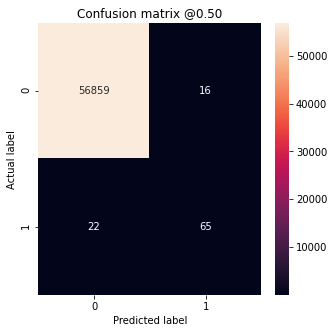

In [ ]:
cnn_test_pred = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred)
a = cnn_test_pred > 0.5
print(classification_report(y_test_enc, a))

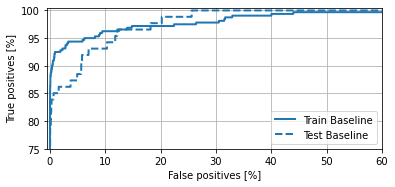

In [ ]:
cnn_train_pred = model.predict(X_train_enc.to_numpy().reshape(len(X_train_enc),X_train_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_train_enc, cnn_train_pred, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

## **Weightened** 

In [ ]:
neg, pos = np.bincount(final_y)
total = neg + pos

weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

initial_bias = np.log([pos/neg])


Weight for class 0: 0.50
Weight for class 1: 289.44


### **Base** 

In [ ]:
model = make_model(input_shape=X_train_enc.shape[-1],output_bias=initial_bias)
#weighted_model.load_weights()

history = model.fit(
    X_train_enc,
    y_train_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/1000
90/90 [==============================] - 4s 20ms/step - loss: 2.2243 - tp: 29.3407 - fp: 79.3736 - tn: 93900.8022 - fn: 131.0549 - accuracy: 0.9978 - precision: 0.2059 - recall: 0.1365 - auc: 0.7281 - val_loss: 0.0076 - val_tp: 34.0000 - val_fp: 5.0000 - val_tn: 45479.0000 - val_fn: 51.0000 - val_accuracy: 0.9988 - val_precision: 0.8718 - val_recall: 0.4000 - val_auc: 0.9223
Epoch 2/1000
90/90 [==============================] - 1s 10ms/step - loss: 0.9988 - tp: 85.9231 - fp: 167.7582 - tn: 93802.5495 - fn: 84.3407 - accuracy: 0.9975 - precision: 0.3577 - recall: 0.4878 - auc: 0.9106 - val_loss: 0.0097 - val_tp: 58.0000 - val_fp: 26.0000 - val_tn: 45458.0000 - val_fn: 27.0000 - val_accuracy: 0.9988 - val_precision: 0.6905 - val_recall: 0.6824 - val_auc: 0.9365
Epoch 3/1000
90/90 [==============================] - 1s 10ms/step - loss: 0.7118 - tp: 112.2747 - fp: 387.5934 - tn: 93582.9890 - fn: 57.7143 - accuracy: 0.9954 - precision: 0.2330 - recall: 0.6371 - auc: 0.9367 - va

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.081118643283844
tp :  75.0
fp :  957.0
tn :  55918.0
fn :  12.0
accuracy :  0.9829886555671692
precision :  0.07267441600561142
recall :  0.8620689511299133
auc :  0.9860689640045166



              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.07      0.86      0.13        87

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.56     56962
weighted avg       1.00      0.98      0.99     56962



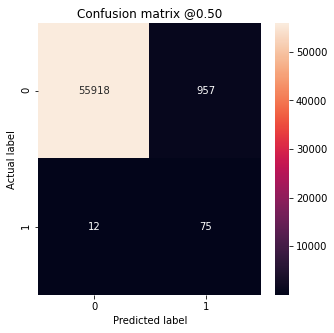

In [ ]:
base_test_pred_wei = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_wei)
a = base_test_pred_wei > 0.5
print(classification_report(y_test_enc, a))

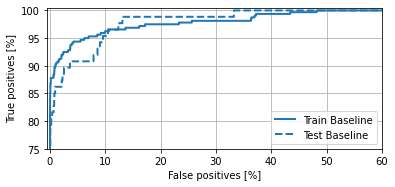

In [ ]:
base_train_pred_wei = model.predict(X_train_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_train_enc, base_train_pred_wei, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_wei, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

### **CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(input_shape=X_train_enc.shape[-1])
history = model.fit(
    X_train_enc.to_numpy().reshape(len(X_train_enc),X_train_enc.shape[-1],1),
    y_train_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc),
    class_weight=class_weight
    )



make_cnn_model

Epoch 1/1000
90/90 [==============================] - 8s 63ms/step - loss: 0.5351 - tp: 209.5275 - fp: 35771.7033 - tn: 115083.4725 - fn: 37.8681 - accuracy: 0.7537 - precision: 0.0061 - recall: 0.8448 - auc: 0.9214 - val_loss: 0.1513 - val_tp: 71.0000 - val_fp: 267.0000 - val_tn: 45217.0000 - val_fn: 14.0000 - val_accuracy: 0.9938 - val_precision: 0.2101 - val_recall: 0.8353 - val_auc: 0.9560
Epoch 2/1000
90/90 [==============================] - 5s 52ms/step - loss: 0.2254 - tp: 152.1538 - fp: 2762.4286 - tn: 91207.8791 - fn: 18.1099 - accuracy: 0.9748 - precision: 0.0682 - recall: 0.8827 - auc: 0.9494 - val_loss: 0.0573 - val_tp: 71.0000 - val_fp: 65.0000 - val_tn: 45419.0000 - val_fn: 14.0000 - val_accuracy: 0.9983 - val_precision: 0.5221 - val_recall: 0.8353 - val_auc: 0.9606
Epoch 3/1000
90/90 [==============================] - 5s 52ms/step - loss: 0.2499 - tp: 151.7912 - fp: 2589.0110 - tn: 91381.5714 - fn: 18.1978 - accuracy: 0.9744 - precision: 0.0834 - recall: 0.8788 - auc: 0.

<function __main__.make_cnn_model>

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.1467813402414322
tp :  77.0
fp :  1425.0
tn :  55450.0
fn :  10.0
accuracy :  0.9748077392578125
precision :  0.05126497894525528
recall :  0.8850574493408203
auc :  0.9856350421905518



              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56875
           1       0.05      0.89      0.10        87

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.54     56962
weighted avg       1.00      0.97      0.99     56962



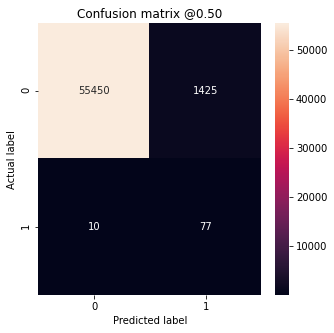

In [ ]:
cnn_test_pred_wei = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_wei)
a = cnn_test_pred_wei > 0.5
print(classification_report(y_test_enc, a))

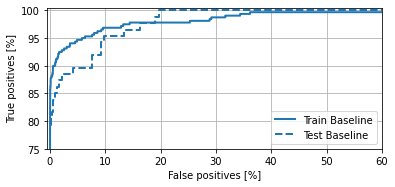

In [ ]:
cnn_train_pred_wei = model.predict(X_train_enc.to_numpy().reshape(len(X_train_enc),X_train_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_train_enc, cnn_train_pred_wei, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_wei, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**Random oversampling**

###**Base**

In [ ]:
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = make_model(X_ros_enc.shape[-1])
history = model.fit(
    X_ros_enc,
    y_ros_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
178/178 [==============================] - 5s 15ms/step - loss: 0.8637 - tp: 84427.3073 - fp: 76756.6648 - tn: 72262.1788 - fn: 7817.3464 - accuracy: 0.6690 - precision: 0.5001 - recall: 0.8828 - auc: 0.8640 - val_loss: 0.6704 - val_tp: 82.0000 - val_fp: 19023.0000 - val_tn: 26461.0000 - val_fn: 3.0000 - val_accuracy: 0.5825 - val_precision: 0.0043 - val_recall: 0.9647 - val_auc: 0.9673
Epoch 2/1000
178/178 [==============================] - 2s 10ms/step - loss: 0.4027 - tp: 87988.7430 - fp: 37112.2793 - tn: 55006.2402 - fn: 4194.2346 - accuracy: 0.7661 - precision: 0.6936 - recall: 0.9561 - auc: 0.9474 - val_loss: 0.3239 - val_tp: 79.0000 - val_fp: 3928.0000 - val_tn: 41556.0000 - val_fn: 6.0000 - val_accuracy: 0.9137 - val_precision: 0.0197 - val_recall: 0.9294 - val_auc: 0.9795
Epoch 3/1000
178/178 [==============================] - 2s 10ms/step - loss: 0.2928 - tp: 86986.5810 - fp: 22298.1788 - tn: 69903.7598 - fn: 5112.9777 - accuracy: 0.8477 - precision: 0.7909 - rec

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.11289754509925842
tp :  76.0
fp :  1404.0
tn :  55471.0
fn :  11.0
accuracy :  0.9751588702201843
precision :  0.05135134980082512
recall :  0.8735632300376892
auc :  0.98882657289505



              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.05      0.87      0.10        87

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.54     56962
weighted avg       1.00      0.98      0.99     56962



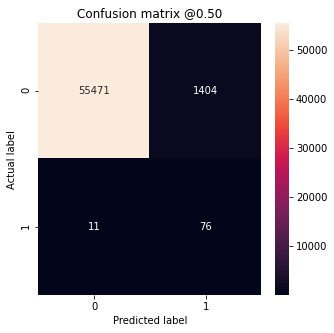

In [ ]:
base_test_pred_ros = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_ros)
a = base_test_pred_ros > 0.5
print(classification_report(y_test_enc, a))

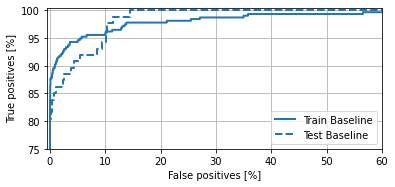

In [ ]:
base_train_pred_ros = model.predict(X_ros_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_ros_enc, base_train_pred_ros, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_ros, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

### **CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_ros_enc.shape[-1])
history = model.fit(
    X_ros_enc.reshape(len(X_ros_enc),X_ros_enc.shape[-1],1),
    y_ros_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
178/178 [==============================] - 11s 53ms/step - loss: 0.3790 - tp: 82536.3520 - fp: 17980.3966 - tn: 74163.4469 - fn: 9621.3017 - accuracy: 0.7772 - precision: 0.7565 - recall: 0.8784 - auc: 0.8933 - val_loss: 0.1240 - val_tp: 72.0000 - val_fp: 818.0000 - val_tn: 44666.0000 - val_fn: 13.0000 - val_accuracy: 0.9818 - val_precision: 0.0809 - val_recall: 0.8471 - val_auc: 0.9767
Epoch 2/1000
178/178 [==============================] - 8s 48ms/step - loss: 0.1313 - tp: 85369.3966 - fp: 2109.4078 - tn: 90009.1117 - fn: 6813.5810 - accuracy: 0.9511 - precision: 0.9757 - recall: 0.9253 - auc: 0.9864 - val_loss: 0.0897 - val_tp: 73.0000 - val_fp: 801.0000 - val_tn: 44683.0000 - val_fn: 12.0000 - val_accuracy: 0.9822 - val_precision: 0.0835 - val_recall: 0.8588 - val_auc: 0.9740
Epoch 3/1000
178/178 [==============================] - 8s 47ms/step - loss: 0.1072 - tp: 86474.3631 - fp: 2104.3966 - tn: 90097.5419 - fn: 5625.1955 - accuracy: 0.9578 - precision: 0.9761 - recal

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.10678302496671677
tp :  76.0
fp :  1094.0
tn :  55781.0
fn :  11.0
accuracy :  0.9806011319160461
precision :  0.06495726853609085
recall :  0.8735632300376892
auc :  0.9849769473075867



              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.07      0.87      0.13        87

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.56     56962
weighted avg       1.00      0.98      0.99     56962



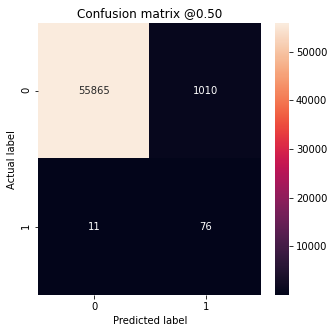

In [ ]:
cnn_test_pred_ros = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_ros)
a = cnn_test_pred_ros > 0.5
print(classification_report(y_test_enc, a))

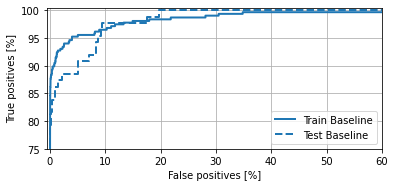

In [ ]:
cnn_train_pred_ros = model.predict(X_ros_enc.reshape(len(X_ros_enc),X_ros_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_ros_enc, cnn_train_pred_ros, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_ros, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**Random undersampling**

###**Base**

In [ ]:
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = make_model(X_rus_enc.shape[-1])
history = model.fit(
    X_rus_enc,
    y_rus_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 1.3738 - tp: 290.0000 - fp: 1302.0000 - tn: 55893.0000 - fn: 117.0000 - accuracy: 0.9754 - precision: 0.1822 - recall: 0.7125 - auc: 0.8647 - val_loss: 1.4162 - val_tp: 67.0000 - val_fp: 44345.0000 - val_tn: 1139.0000 - val_fn: 18.0000 - val_accuracy: 0.0265 - val_precision: 0.0015 - val_recall: 0.7882 - val_auc: 0.4944
Epoch 2/1000
1/1 [==============================] - 0s 187ms/step - loss: 1.4611 - tp: 207.0000 - fp: 298.0000 - tn: 22.0000 - fn: 113.0000 - accuracy: 0.3578 - precision: 0.4099 - recall: 0.6469 - auc: 0.4803 - val_loss: 1.4157 - val_tp: 70.0000 - val_fp: 44342.0000 - val_tn: 1142.0000 - val_fn: 15.0000 - val_accuracy: 0.0266 - val_precision: 0.0016 - val_recall: 0.8235 - val_auc: 0.5214
Epoch 3/1000
1/1 [==============================] - 0s 196ms/step - loss: 1.2574 - tp: 216.0000 - fp: 293.0000 - tn: 27.0000 - fn: 104.0000 - accuracy: 0.3797 - precision: 0.4244 - recall: 0.6750 - auc: 0.5241 - val

In [ ]:
len(y_rus_enc)

640

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.2528209090232849
tp :  77.0
fp :  3995.0
tn :  52880.0
fn :  10.0
accuracy :  0.9296899437904358
precision :  0.018909627571702003
recall :  0.8850574493408203
auc :  0.9741422533988953



              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56875
           1       0.02      0.89      0.04        87

    accuracy                           0.93     56962
   macro avg       0.51      0.91      0.50     56962
weighted avg       1.00      0.93      0.96     56962



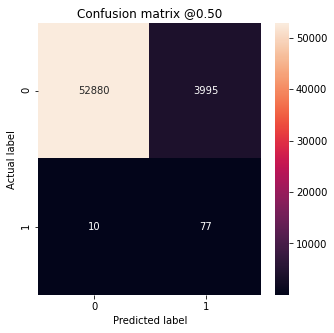

In [ ]:
base_test_pred_rus = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_rus)
a = base_test_pred_rus > 0.5
print(classification_report(y_test_enc, a))

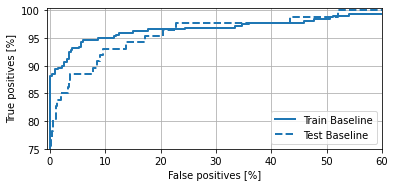

In [ ]:
base_train_pred_rus = model.predict(X_rus_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_rus_enc, base_train_pred_rus, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_rus, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

### **CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_rus_enc.shape[-1])
history = model.fit(
    X_rus_enc.reshape(len(X_rus_enc),X_rus_enc.shape[-1],1),
    y_rus_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 1.0487 - tp: 150.0000 - fp: 318.0000 - tn: 2.0000 - fn: 170.0000 - accuracy: 0.2375 - precision: 0.3205 - recall: 0.4688 - auc: 0.1229 - val_loss: 1.2151 - val_tp: 85.0000 - val_fp: 45484.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.0019 - val_precision: 0.0019 - val_recall: 1.0000 - val_auc: 0.8115
Epoch 2/1000
1/1 [==============================] - 1s 643ms/step - loss: 0.7589 - tp: 309.0000 - fp: 320.0000 - tn: 0.0000e+00 - fn: 11.0000 - accuracy: 0.4828 - precision: 0.4913 - recall: 0.9656 - auc: 0.6823 - val_loss: 1.2701 - val_tp: 85.0000 - val_fp: 45484.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.0019 - val_precision: 0.0019 - val_recall: 1.0000 - val_auc: 0.9404
Epoch 3/1000
1/1 [==============================] - 1s 618ms/step - loss: 0.7058 - tp: 320.0000 - fp: 320.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - auc: 0.

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.1688688099384308
tp :  76.0
fp :  1848.0
tn :  55027.0
fn :  11.0
accuracy :  0.9673641920089722
precision :  0.039501041173934937
recall :  0.8735632300376892
auc :  0.9803807735443115



              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56875
           1       0.10      0.84      0.18        87

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.58     56962
weighted avg       1.00      0.99      0.99     56962



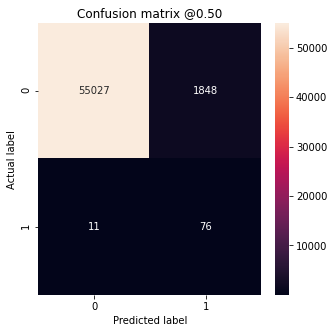

In [ ]:
cnn_test_pred_rus = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_rus)
a = cnn_test_pred_rus > 0.75
print(classification_report(y_test_enc, a))

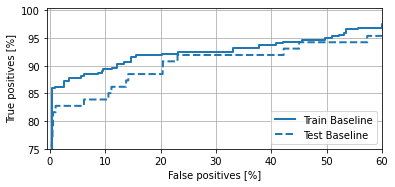

In [ ]:
cnn_train_pred_rus = model.predict(X_rus_enc.reshape(len(X_rus_enc),X_rus_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_rus_enc, cnn_train_pred_rus, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_rus, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**tomeklinks**

###**Base**

In [ ]:
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = make_model(X_tom_enc.shape[-1])
history = model.fit(
    X_tom_enc,
    y_tom_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
89/89 [==============================] - 4s 25ms/step - loss: 1.2733 - tp: 173.5444 - fp: 132899.4778 - tn: 16967.3222 - fn: 82.6111 - accuracy: 0.0962 - precision: 0.0013 - recall: 0.7088 - auc: 0.6074 - val_loss: 0.7164 - val_tp: 29.0000 - val_fp: 24473.0000 - val_tn: 21011.0000 - val_fn: 56.0000 - val_accuracy: 0.4617 - val_precision: 0.0012 - val_recall: 0.3412 - val_auc: 0.3271
Epoch 2/1000
89/89 [==============================] - 1s 12ms/step - loss: 0.6954 - tp: 64.0444 - fp: 39081.1889 - tn: 53907.4778 - fn: 108.2444 - accuracy: 0.5478 - precision: 0.0017 - recall: 0.3857 - auc: 0.3881 - val_loss: 0.3150 - val_tp: 3.0000 - val_fp: 760.0000 - val_tn: 44724.0000 - val_fn: 82.0000 - val_accuracy: 0.9815 - val_precision: 0.0039 - val_recall: 0.0353 - val_auc: 0.3011
Epoch 3/1000
89/89 [==============================] - 1s 12ms/step - loss: 0.3864 - tp: 34.9667 - fp: 16559.8000 - tn: 76436.4778 - fn: 129.7111 - accuracy: 0.8102 - precision: 0.0020 - recall: 0.2153 - auc

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.006563215516507626
tp :  51.0
fp :  12.0
tn :  56863.0
fn :  36.0
accuracy :  0.9991573095321655
precision :  0.8095238208770752
recall :  0.5862069129943848
auc :  0.8726453185081482



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.81      0.59      0.68        87

    accuracy                           1.00     56962
   macro avg       0.90      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



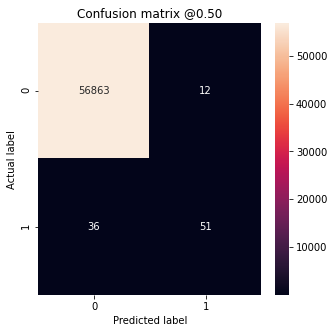

In [ ]:
base_test_pred_tom = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_tom)
a = base_test_pred_tom > 0.5
print(classification_report(y_test_enc, a))

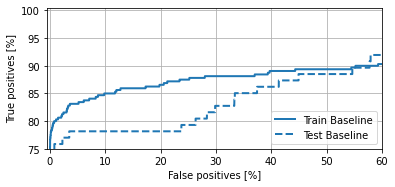

In [ ]:
base_train_pred_tom = model.predict(X_tom_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_tom_enc, base_train_pred_tom, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_tom, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

###**CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_tom_enc.shape[-1])
history = model.fit(
    X_tom_enc.reshape(len(X_tom_enc),X_tom_enc.shape[-1],1),
    y_tom_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
89/89 [==============================] - 8s 69ms/step - loss: 0.2908 - tp: 53.9667 - fp: 8663.0333 - tn: 141203.7667 - fn: 202.1889 - accuracy: 0.9333 - precision: 0.0064 - recall: 0.2474 - auc: 0.5801 - val_loss: 0.0304 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45484.0000 - val_fn: 85.0000 - val_accuracy: 0.9981 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.2759
Epoch 2/1000
89/89 [==============================] - 5s 52ms/step - loss: 0.0245 - tp: 0.5444 - fp: 0.0000e+00 - tn: 92988.6667 - fn: 171.7444 - accuracy: 0.9981 - precision: 0.1667 - recall: 0.0018 - auc: 0.5202 - val_loss: 0.0103 - val_tp: 21.0000 - val_fp: 6.0000 - val_tn: 45478.0000 - val_fn: 64.0000 - val_accuracy: 0.9985 - val_precision: 0.7778 - val_recall: 0.2471 - val_auc: 0.8599
Epoch 3/1000
89/89 [==============================] - 5s 57ms/step - loss: 0.0089 - tp: 70.9000 - fp: 8.6222 - tn: 92987.6556 - fn: 93.7778 - accuracy: 0.9988 - precision: 0.8829 - recall: 0.3847 - 

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.0037407861091196537
tp :  65.0
fp :  16.0
tn :  56859.0
fn :  22.0
accuracy :  0.9993329048156738
precision :  0.8024691343307495
recall :  0.7471264600753784
auc :  0.9397690296173096



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.80      0.75      0.77        87

    accuracy                           1.00     56962
   macro avg       0.90      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



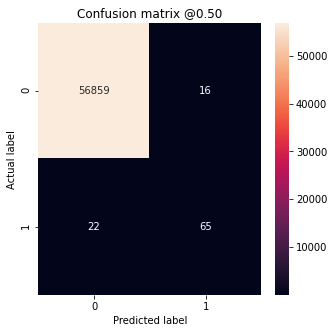

In [ ]:
cnn_test_pred_tom = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_tom)
a = cnn_test_pred_tom > 0.5
print(classification_report(y_test_enc, a))

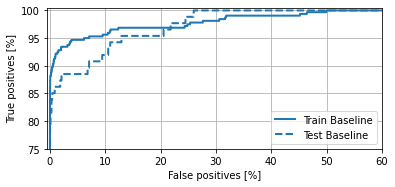

In [ ]:
cnn_train_pred_tom = model.predict(X_tom_enc.reshape(len(X_tom_enc),X_tom_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_tom_enc, cnn_train_pred_tom, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_tom, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**SMOTE**

###**Base**

In [ ]:
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = make_model(X_smt_enc.shape[-1])
history = model.fit(
    X_smt_enc,
    y_smt_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
178/178 [==============================] - 5s 16ms/step - loss: 0.8594 - tp: 84879.6313 - fp: 75122.7765 - tn: 73896.0670 - fn: 7365.0223 - accuracy: 0.6789 - precision: 0.5120 - recall: 0.8862 - auc: 0.8893 - val_loss: 0.6614 - val_tp: 82.0000 - val_fp: 18513.0000 - val_tn: 26971.0000 - val_fn: 3.0000 - val_accuracy: 0.5937 - val_precision: 0.0044 - val_recall: 0.9647 - val_auc: 0.9663
Epoch 2/1000
178/178 [==============================] - 2s 10ms/step - loss: 0.3895 - tp: 88855.3911 - fp: 36493.0168 - tn: 55625.5028 - fn: 3327.5866 - accuracy: 0.7742 - precision: 0.6991 - recall: 0.9658 - auc: 0.9550 - val_loss: 0.3074 - val_tp: 78.0000 - val_fp: 3524.0000 - val_tn: 41960.0000 - val_fn: 7.0000 - val_accuracy: 0.9225 - val_precision: 0.0217 - val_recall: 0.9176 - val_auc: 0.9774
Epoch 3/1000
178/178 [==============================] - 2s 10ms/step - loss: 0.2768 - tp: 87621.0950 - fp: 21666.9609 - tn: 70534.9777 - fn: 4478.4637 - accuracy: 0.8546 - precision: 0.7968 - rec

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.11238137632608414
tp :  75.0
fp :  1429.0
tn :  55446.0
fn :  12.0
accuracy :  0.9747024178504944
precision :  0.04986702278256416
recall :  0.8620689511299133
auc :  0.983577311038971



              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56875
           1       0.05      0.86      0.09        87

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.54     56962
weighted avg       1.00      0.97      0.99     56962



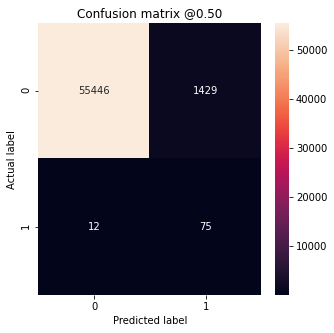

In [ ]:
base_test_pred_smt = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_smt)
a = base_test_pred_smt > 0.5
print(classification_report(y_test_enc, a))

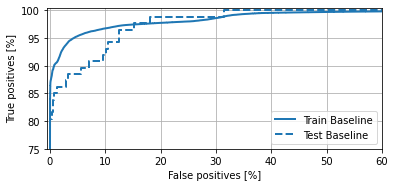

In [ ]:
base_train_pred_smt = model.predict(X_smt_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_smt_enc, base_train_pred_smt, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_smt, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

###**CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_smt_enc.shape[-1])
history = model.fit(
    X_smt_enc.reshape(len(X_smt_enc),X_smt_enc.shape[-1],1),
    y_smt_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
178/178 [==============================] - 12s 54ms/step - loss: 0.3652 - tp: 82550.8380 - fp: 18645.7765 - tn: 130373.0670 - fn: 9693.8156 - accuracy: 0.8703 - precision: 0.7478 - recall: 0.8777 - auc: 0.9532 - val_loss: 0.1131 - val_tp: 72.0000 - val_fp: 833.0000 - val_tn: 44651.0000 - val_fn: 13.0000 - val_accuracy: 0.9814 - val_precision: 0.0796 - val_recall: 0.8471 - val_auc: 0.9693
Epoch 2/1000
178/178 [==============================] - 9s 49ms/step - loss: 0.1253 - tp: 85654.8436 - fp: 2046.6089 - tn: 90071.9106 - fn: 6528.1341 - accuracy: 0.9532 - precision: 0.9766 - recall: 0.9288 - auc: 0.9877 - val_loss: 0.0803 - val_tp: 72.0000 - val_fp: 753.0000 - val_tn: 44731.0000 - val_fn: 13.0000 - val_accuracy: 0.9832 - val_precision: 0.0873 - val_recall: 0.8471 - val_auc: 0.9689
Epoch 3/1000
178/178 [==============================] - 9s 49ms/step - loss: 0.1052 - tp: 86459.1229 - fp: 2003.2458 - tn: 90198.6927 - fn: 5640.4358 - accuracy: 0.9581 - precision: 0.9771 - reca

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.11312832683324814
tp :  75.0
fp :  1026.0
tn :  55849.0
fn :  12.0
accuracy :  0.9817773103713989
precision :  0.06811989098787308
recall :  0.8620689511299133
auc :  0.9770450592041016



              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.07      0.86      0.13        87

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.56     56962
weighted avg       1.00      0.98      0.99     56962



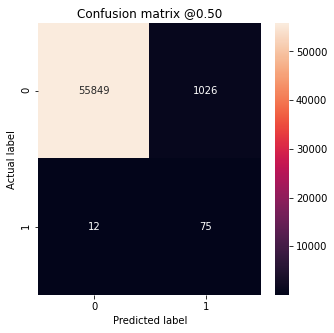

In [ ]:
cnn_test_pred_smt = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_smt)
a = cnn_test_pred_smt > 0.5
print(classification_report(y_test_enc, a))

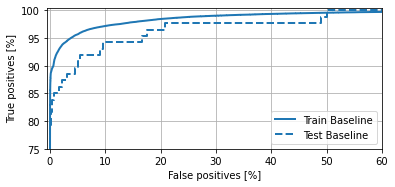

In [ ]:
cnn_train_pred_smt = model.predict(X_smt_enc.reshape(len(X_smt_enc),X_smt_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_smt_enc, cnn_train_pred_smt, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_smt, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**Adasyn**

###**Base**

In [ ]:
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = make_model(X_ads_enc.shape[-1])
history = model.fit(
    X_ads_enc,
    y_ads_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
178/178 [==============================] - 5s 15ms/step - loss: 0.7797 - tp: 86087.0726 - fp: 73527.7207 - tn: 75469.0615 - fn: 6179.7765 - accuracy: 0.6904 - precision: 0.5221 - recall: 0.9251 - auc: 0.8540 - val_loss: 0.6177 - val_tp: 83.0000 - val_fp: 15438.0000 - val_tn: 30046.0000 - val_fn: 2.0000 - val_accuracy: 0.6612 - val_precision: 0.0053 - val_recall: 0.9765 - val_auc: 0.9768
Epoch 2/1000
178/178 [==============================] - 2s 10ms/step - loss: 0.4631 - tp: 83125.9106 - fp: 34200.4972 - tn: 58013.9050 - fn: 8961.3184 - accuracy: 0.7579 - precision: 0.6991 - recall: 0.9061 - auc: 0.8849 - val_loss: 0.3525 - val_tp: 80.0000 - val_fp: 5672.0000 - val_tn: 39812.0000 - val_fn: 5.0000 - val_accuracy: 0.8754 - val_precision: 0.0139 - val_recall: 0.9412 - val_auc: 0.9800
Epoch 3/1000
178/178 [==============================] - 2s 10ms/step - loss: 0.3689 - tp: 81510.1788 - fp: 21367.8659 - tn: 70928.7933 - fn: 10494.7933 - accuracy: 0.8243 - precision: 0.7878 - re

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.3523308336734772
tp :  83.0
fp :  6969.0
tn :  49906.0
fn :  4.0
accuracy :  0.8775850534439087
precision :  0.011769711039960384
recall :  0.954023003578186
auc :  0.9806014895439148



              precision    recall  f1-score   support

           0       1.00      0.88      0.93     56875
           1       0.01      0.95      0.02        87

    accuracy                           0.88     56962
   macro avg       0.51      0.92      0.48     56962
weighted avg       1.00      0.88      0.93     56962



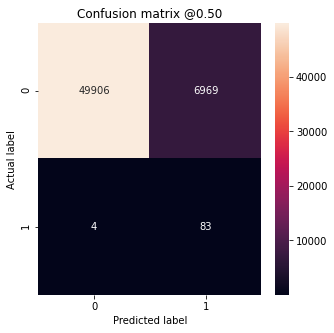

In [ ]:
base_test_pred_ads = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_ads)
a = base_test_pred_ads > 0.5
print(classification_report(y_test_enc, a))

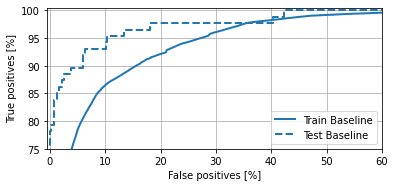

In [ ]:
base_train_pred_ads = model.predict(X_ads_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_ads_enc, base_train_pred_ads, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_ads, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

###**CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_ads_enc.shape[-1])
history = model.fit(
    X_ads_enc.reshape(len(X_ads_enc),X_ads_enc.shape[-1],1),
    y_ads_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
178/178 [==============================] - 12s 55ms/step - loss: 0.4524 - tp: 78525.7709 - fp: 29956.5978 - tn: 119040.1844 - fn: 13741.0782 - accuracy: 0.8073 - precision: 0.6614 - recall: 0.8558 - auc: 0.9069 - val_loss: 0.2049 - val_tp: 74.0000 - val_fp: 2922.0000 - val_tn: 42562.0000 - val_fn: 11.0000 - val_accuracy: 0.9356 - val_precision: 0.0247 - val_recall: 0.8706 - val_auc: 0.9619
Epoch 2/1000
178/178 [==============================] - 9s 50ms/step - loss: 0.2014 - tp: 84559.2011 - fp: 6867.8883 - tn: 85346.5140 - fn: 7528.0279 - accuracy: 0.9179 - precision: 0.9229 - recall: 0.9117 - auc: 0.9767 - val_loss: 0.1399 - val_tp: 75.0000 - val_fp: 2258.0000 - val_tn: 43226.0000 - val_fn: 10.0000 - val_accuracy: 0.9502 - val_precision: 0.0321 - val_recall: 0.8824 - val_auc: 0.9572
Epoch 3/1000
178/178 [==============================] - 9s 50ms/step - loss: 0.1363 - tp: 88715.9330 - fp: 5256.5140 - tn: 87040.1453 - fn: 3289.0391 - accuracy: 0.9523 - precision: 0.9429 - r

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.20474261045455933
tp :  79.0
fp :  3596.0
tn :  53279.0
fn :  8.0
accuracy :  0.9367297291755676
precision :  0.021496599540114403
recall :  0.9080459475517273
auc :  0.9725425839424133



              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56875
           1       0.02      0.91      0.04        87

    accuracy                           0.94     56962
   macro avg       0.51      0.92      0.50     56962
weighted avg       1.00      0.94      0.97     56962



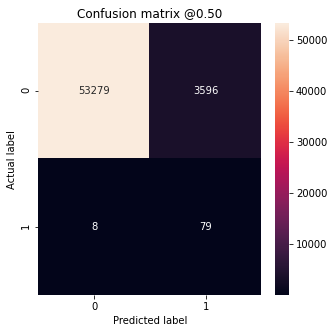

In [ ]:
cnn_test_pred_ads = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_ads)
a = cnn_test_pred_ads > 0.5
print(classification_report(y_test_enc, a))

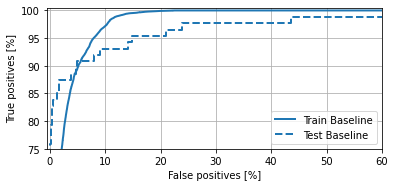

In [ ]:
cnn_train_pred_ads = model.predict(X_ads_enc.reshape(len(X_ads_enc),X_ads_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_ads_enc, cnn_train_pred_ads, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_ads, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**SMOTE plus TOMEK**

###**Base**

In [ ]:
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = make_model(X_smtom_enc.shape[-1])
history = model.fit(
    X_smtom_enc,
    y_smtom_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
178/178 [==============================] - 5s 16ms/step - loss: 0.8594 - tp: 84893.6313 - fp: 78702.7765 - tn: 70316.0670 - fn: 7351.0223 - accuracy: 0.6595 - precision: 0.4890 - recall: 0.8866 - auc: 0.8653 - val_loss: 0.6614 - val_tp: 82.0000 - val_fp: 18513.0000 - val_tn: 26971.0000 - val_fn: 3.0000 - val_accuracy: 0.5937 - val_precision: 0.0044 - val_recall: 0.9647 - val_auc: 0.9663
Epoch 2/1000
178/178 [==============================] - 2s 10ms/step - loss: 0.3895 - tp: 88855.3911 - fp: 36493.0168 - tn: 55625.5028 - fn: 3327.5866 - accuracy: 0.7742 - precision: 0.6991 - recall: 0.9658 - auc: 0.9550 - val_loss: 0.3074 - val_tp: 78.0000 - val_fp: 3524.0000 - val_tn: 41960.0000 - val_fn: 7.0000 - val_accuracy: 0.9225 - val_precision: 0.0217 - val_recall: 0.9176 - val_auc: 0.9774
Epoch 3/1000
178/178 [==============================] - 2s 10ms/step - loss: 0.2768 - tp: 87621.0950 - fp: 21666.9609 - tn: 70534.9777 - fn: 4478.4637 - accuracy: 0.8546 - precision: 0.7968 - rec

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.11238137632608414
tp :  75.0
fp :  1429.0
tn :  55446.0
fn :  12.0
accuracy :  0.9747024178504944
precision :  0.04986702278256416
recall :  0.8620689511299133
auc :  0.983577311038971



              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56875
           1       0.05      0.86      0.09        87

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.54     56962
weighted avg       1.00      0.97      0.99     56962



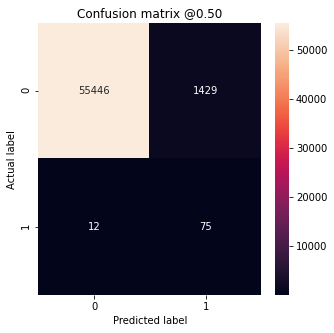

In [ ]:
base_test_pred_smtom = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_smtom)
a = base_test_pred_smtom > 0.5
print(classification_report(y_test_enc, a))

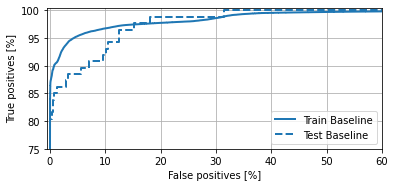

In [ ]:
base_train_pred_smtom = model.predict(X_smtom_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_smtom_enc, base_train_pred_smtom, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_smtom, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

###**CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_smtom_enc.shape[-1])
history = model.fit(
    X_smtom_enc.reshape(len(X_smtom_enc),X_smtom_enc.shape[-1],1),
    y_smtom_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
178/178 [==============================] - 12s 55ms/step - loss: 0.3652 - tp: 82550.8380 - fp: 18645.7765 - tn: 130373.0670 - fn: 9693.8156 - accuracy: 0.8703 - precision: 0.7478 - recall: 0.8777 - auc: 0.9532 - val_loss: 0.1131 - val_tp: 72.0000 - val_fp: 833.0000 - val_tn: 44651.0000 - val_fn: 13.0000 - val_accuracy: 0.9814 - val_precision: 0.0796 - val_recall: 0.8471 - val_auc: 0.9693
Epoch 2/1000
178/178 [==============================] - 9s 49ms/step - loss: 0.1253 - tp: 85654.8436 - fp: 2046.6089 - tn: 90071.9106 - fn: 6528.1341 - accuracy: 0.9532 - precision: 0.9766 - recall: 0.9288 - auc: 0.9877 - val_loss: 0.0803 - val_tp: 72.0000 - val_fp: 753.0000 - val_tn: 44731.0000 - val_fn: 13.0000 - val_accuracy: 0.9832 - val_precision: 0.0873 - val_recall: 0.8471 - val_auc: 0.9689
Epoch 3/1000
178/178 [==============================] - 9s 50ms/step - loss: 0.1052 - tp: 86459.1229 - fp: 2003.2458 - tn: 90198.6927 - fn: 5640.4358 - accuracy: 0.9581 - precision: 0.9771 - reca

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.11312832683324814
tp :  75.0
fp :  1026.0
tn :  55849.0
fn :  12.0
accuracy :  0.9817773103713989
precision :  0.06811989098787308
recall :  0.8620689511299133
auc :  0.9770450592041016



              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.07      0.86      0.13        87

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.56     56962
weighted avg       1.00      0.98      0.99     56962



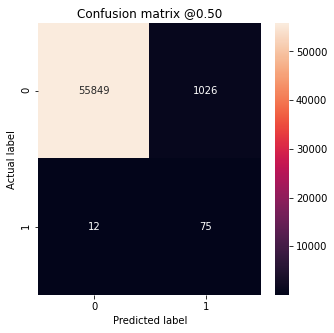

In [ ]:
cnn_test_pred_smtom = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_smtom)
a = cnn_test_pred_smtom > 0.5
print(classification_report(y_test_enc, a))

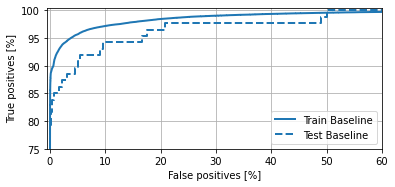

In [ ]:
cnn_train_pred_smtom = model.predict(X_smtom_enc.reshape(len(X_smtom_enc),X_smtom_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_smtom_enc, cnn_train_pred_smtom, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_smtom, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**Oversampling plus TOMEK**

###**Base**

In [ ]:
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = make_model(X_rostom_enc.shape[-1])
history = model.fit(
    X_rostom_enc,
    y_rostom_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc, y_val_enc))

Epoch 1/1000
143/143 [==============================] - 5s 17ms/step - loss: 1.0086 - tp: 50096.6667 - fp: 78391.5903 - tn: 71261.4375 - fn: 5653.9861 - accuracy: 0.6200 - precision: 0.3705 - recall: 0.8648 - auc: 0.8478 - val_loss: 0.7294 - val_tp: 84.0000 - val_fp: 23164.0000 - val_tn: 22320.0000 - val_fn: 1.0000 - val_accuracy: 0.4917 - val_precision: 0.0036 - val_recall: 0.9882 - val_auc: 0.9645
Epoch 2/1000
143/143 [==============================] - 1s 10ms/step - loss: 0.5076 - tp: 52987.0833 - fp: 41139.3403 - tn: 51506.7917 - fn: 2808.4653 - accuracy: 0.6892 - precision: 0.5514 - recall: 0.9511 - auc: 0.9345 - val_loss: 0.3578 - val_tp: 78.0000 - val_fp: 4323.0000 - val_tn: 41161.0000 - val_fn: 7.0000 - val_accuracy: 0.9050 - val_precision: 0.0177 - val_recall: 0.9176 - val_auc: 0.9785
Epoch 3/1000
143/143 [==============================] - 1s 10ms/step - loss: 0.3531 - tp: 52174.9028 - fp: 24100.9861 - tn: 68768.4861 - fn: 3397.3056 - accuracy: 0.8087 - precision: 0.6759 - rec

In [ ]:
#test results
results = model.evaluate(X_test_enc, y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.07809235900640488
tp :  75.0
fp :  836.0
tn :  56039.0
fn :  12.0
accuracy :  0.9851129055023193
precision :  0.08232711255550385
recall :  0.8620689511299133
auc :  0.9878331422805786



              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56875
           1       0.08      0.86      0.15        87

    accuracy                           0.99     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.99      0.99     56962



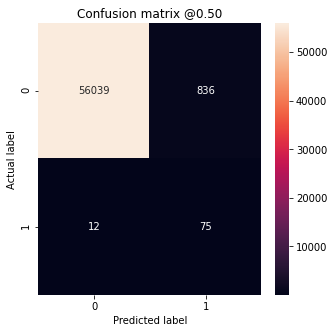

In [ ]:
base_test_pred_rostom = model.predict(X_test_enc, batch_size=BATCH_SIZE)
plot_cm(y_test_enc, base_test_pred_rostom)
a = base_test_pred_rostom > 0.5
print(classification_report(y_test_enc, a))

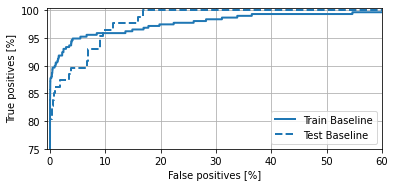

In [ ]:
base_train_pred_rostom = model.predict(X_rostom_enc, batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_rostom_enc, base_train_pred_rostom, color=colors[0])
plot_roc("Test Baseline", y_test_enc, base_test_pred_rostom, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

###**CNN**

In [ ]:
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)
model = make_cnn_model(X_rostom_enc.shape[-1])
history = model.fit(
    X_rostom_enc.reshape(len(X_rostom_enc),X_rostom_enc.shape[-1],1),
    y_rostom_enc,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_enc.to_numpy().reshape(len(X_val_enc),X_val_enc.shape[-1],1), y_val_enc))

Epoch 1/1000
143/143 [==============================] - 10s 57ms/step - loss: 0.4088 - tp: 48343.2500 - fp: 17451.0000 - tn: 132202.0278 - fn: 7407.4028 - accuracy: 0.8674 - precision: 0.6614 - recall: 0.8466 - auc: 0.9415 - val_loss: 0.0957 - val_tp: 72.0000 - val_fp: 505.0000 - val_tn: 44979.0000 - val_fn: 13.0000 - val_accuracy: 0.9886 - val_precision: 0.1248 - val_recall: 0.8471 - val_auc: 0.9733
Epoch 2/1000
143/143 [==============================] - 8s 54ms/step - loss: 0.1284 - tp: 50718.4653 - fp: 1203.3125 - tn: 91442.8194 - fn: 5077.0833 - accuracy: 0.9574 - precision: 0.9769 - recall: 0.9084 - auc: 0.9824 - val_loss: 0.0781 - val_tp: 72.0000 - val_fp: 519.0000 - val_tn: 44965.0000 - val_fn: 13.0000 - val_accuracy: 0.9883 - val_precision: 0.1218 - val_recall: 0.8471 - val_auc: 0.9746
Epoch 3/1000
143/143 [==============================] - 7s 50ms/step - loss: 0.1132 - tp: 51008.0278 - fp: 1261.8333 - tn: 91607.6389 - fn: 4564.1806 - accuracy: 0.9603 - precision: 0.9753 - reca

In [ ]:
#test results
results = model.evaluate(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), y_test_enc, batch_size=BATCH_SIZE, verbose=0)

print("test results :")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

test results :
loss :  0.07840044051408768
tp :  74.0
fp :  629.0
tn :  56246.0
fn :  13.0
accuracy :  0.9887293577194214
precision :  0.10526315867900848
recall :  0.8505747318267822
auc :  0.986392080783844



              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56875
           1       0.11      0.85      0.19        87

    accuracy                           0.99     56962
   macro avg       0.55      0.92      0.59     56962
weighted avg       1.00      0.99      0.99     56962



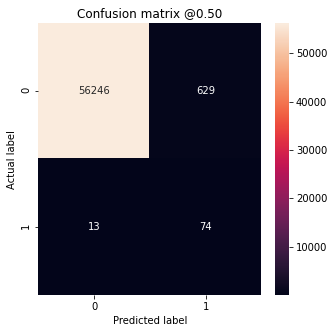

In [ ]:
cnn_test_pred_rostom = model.predict(X_test_enc.to_numpy().reshape(len(X_test_enc),X_test_enc.shape[-1],1), batch_size=BATCH_SIZE)
plot_cm(y_test_enc, cnn_test_pred_rostom)
a = cnn_test_pred_rostom > 0.5
print(classification_report(y_test_enc, a))

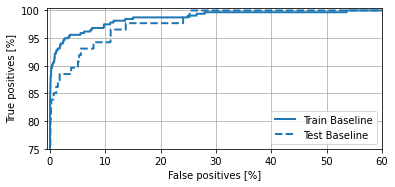

In [ ]:
cnn_train_pred_rostom = model.predict(X_rostom_enc.reshape(len(X_rostom_enc),X_rostom_enc.shape[-1],1), batch_size=BATCH_SIZE)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_roc("Train Baseline", y_rostom_enc, cnn_train_pred_rostom, color=colors[0])
plot_roc("Test Baseline", y_test_enc, cnn_test_pred_rostom, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

##**Plot ROC Results**

### **Base ROC**

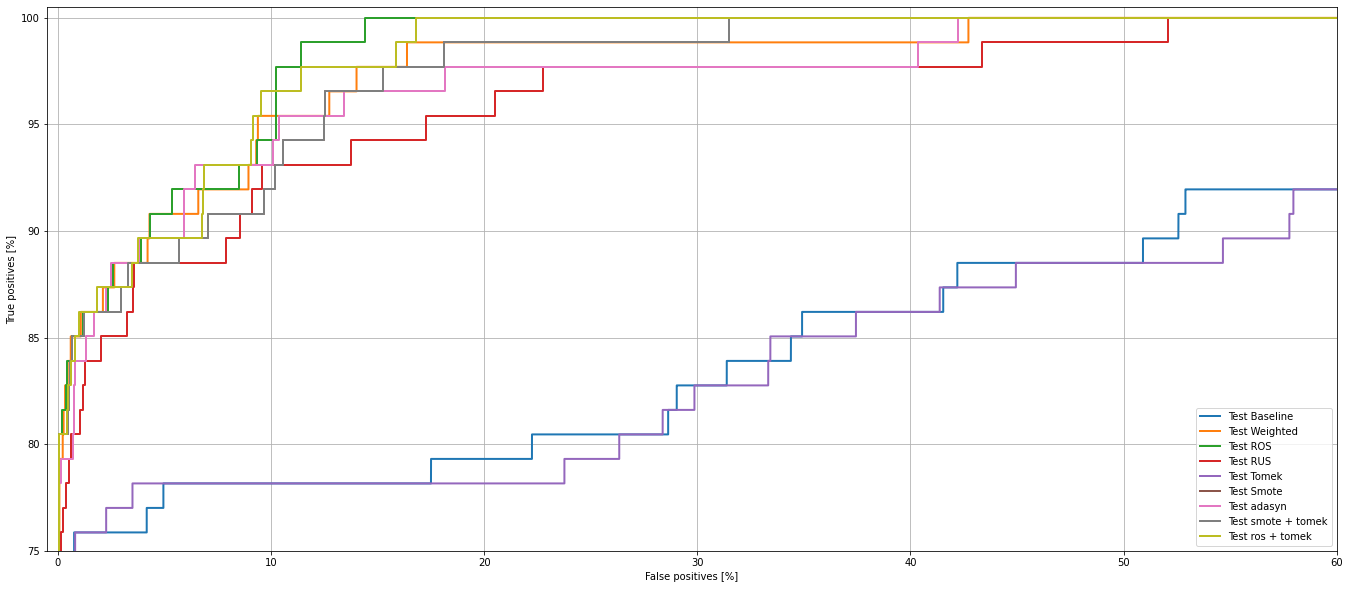

In [ ]:
plt.rcParams["figure.figsize"] = (25, 10)
plot_roc("Test Baseline", y_test_enc, base_test_pred, color=colors[0])

plot_roc("Test Weighted", y_test_enc, base_test_pred_wei, color=colors[1])

plot_roc("Test ROS", y_test_enc, base_test_pred_ros, color=colors[2])

plot_roc("Test RUS", y_test_enc, base_test_pred_rus, color=colors[3])
plot_roc("Test Tomek", y_test_enc, base_test_pred_tom, color=colors[4])
plot_roc("Test Smote", y_test_enc, base_test_pred_smt, color=colors[5])
plot_roc("Test adasyn", y_test_enc, base_test_pred_ads, color=colors[6])
plot_roc("Test smote + tomek", y_test_enc, base_test_pred_smtom, color=colors[7])
plot_roc("Test ros + tomek", y_test_enc, base_test_pred_rostom, color=colors[8])


plt.legend(loc='lower right')

### **CNN ROC**

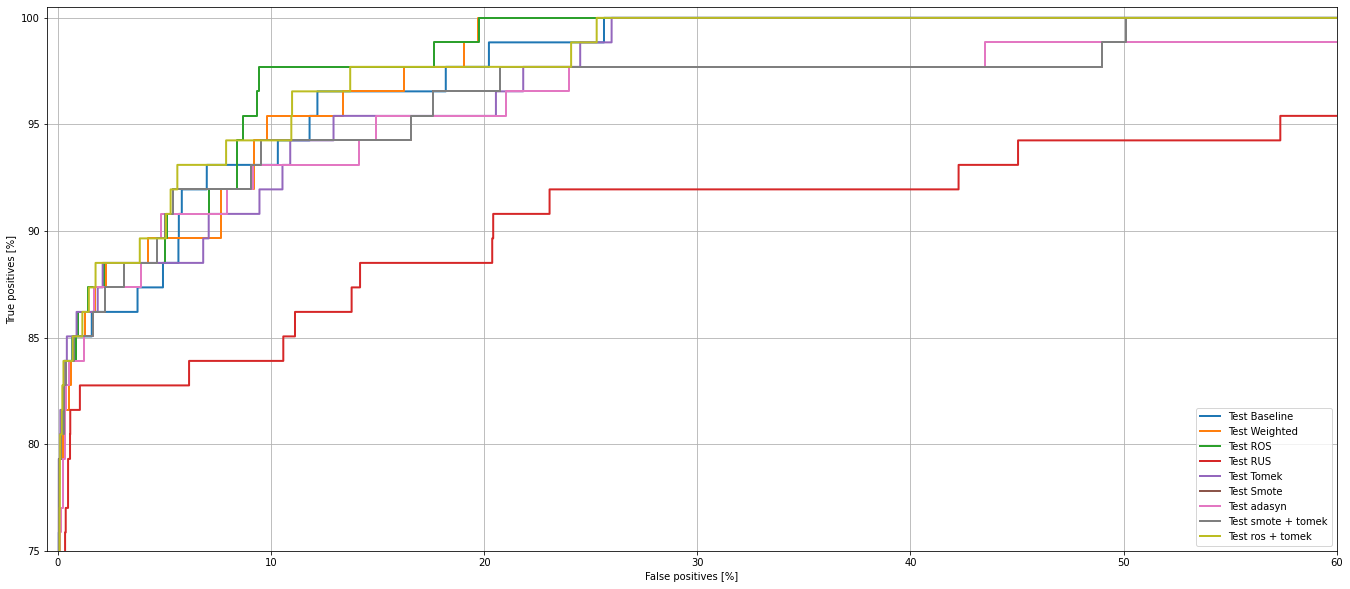

In [ ]:
plt.rcParams["figure.figsize"] = (25, 10)
plot_roc("Test Baseline", y_test_enc, cnn_test_pred, color=colors[0])

plot_roc("Test Weighted", y_test_enc,cnn_test_pred_wei, color=colors[1])

plot_roc("Test ROS", y_test_enc, cnn_test_pred_ros, color=colors[2])

plot_roc("Test RUS", y_test_enc, cnn_test_pred_rus, color=colors[3])
plot_roc("Test Tomek", y_test_enc, cnn_test_pred_tom, color=colors[4])
plot_roc("Test Smote", y_test_enc, cnn_test_pred_smt, color=colors[5])
plot_roc("Test adasyn", y_test_enc, cnn_test_pred_ads, color=colors[6])
plot_roc("Test smote + tomek", y_test_enc, cnn_test_pred_smtom, color=colors[7])
plot_roc("Test ros + tomek", y_test_enc, cnn_test_pred_rostom, color=colors[8])


plt.legend(loc='lower right')